<a href="https://colab.research.google.com/github/ngwalker93/ADS-504-Final-Team-Project/blob/nwalker/ADS_504FinalProj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 504 Final Team Project
# Weight Lifting Exercises monitored with Inertial Measurement Units

### Team 6: Kiara Paz, Jordan Torres, and Nancy Walker

## Introduction
 This project aims to assess the application of machine learning methods and programming techniques.

## Dataset Discription
Weight Lifting Exercises monitored with Inertial Measurement Units: https://archive.ics.uci.edu/dataset/273/weight+lifting+exercises+monitored+with+inertial+measurement+units

The data set was sourced from the UC Irvine Machine Learning Repository. It contains observations of six healthy subjects that performed 5 variations of the bicep curl weight lifting exercise. A health care professional predicted one of the varaitions.

## Problem Definition


## Import Libraries and Dataset

In [1]:
# Import Libaries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns
import sklearn.linear_model
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score
import math
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample
import scipy.stats as st
from scipy import stats
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelBinarizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import numpy as np
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Attach GitHub repository to retrieve dataset
!git clone https://github.com/ngwalker93/ADS-504-Final-Team-Project.git

fatal: destination path 'ADS-504-Final-Team-Project' already exists and is not an empty directory.


In [3]:
# Check that repository was added
!ls ADS-504-Final-Team-Project

ADS_504FinalProj.ipynb
Example_WearableComputing_weight_lifting_exercises_biceps_curl_variations.csv
README.md


In [4]:
# Read .csv file
df = pd.read_csv('ADS-504-Final-Team-Project/Example_WearableComputing_weight_lifting_exercises_biceps_curl_variations.csv', skiprows=1, delimiter=',')
df.head()

,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,eurico,1322489729,34670,28/11/2011 14:15,no,1,3.70,41.6,-82.8,3,...,-0.05,-0.37,-0.43,-170,155,184,-1160,1400,-876,E
1,eurico,1322489729,62641,28/11/2011 14:15,no,1,3.66,42.8,-82.5,2,...,-0.06,-0.37,-0.59,-178,164,182,-1150,1410,-871,E
2,eurico,1322489729,70653,28/11/2011 14:15,no,1,3.58,43.7,-82.3,1,...,-0.05,-0.27,-0.72,-182,172,185,-1130,1400,-863,E
3,eurico,1322489729,82654,28/11/2011 14:15,no,1,3.56,44.4,-82.1,1,...,0.02,-0.24,-0.79,-185,182,188,-1120,1400,-855,E
4,eurico,1322489729,90637,28/11/2011 14:15,no,1,3.57,45.1,-81.9,1,...,0.08,-0.27,-0.82,-188,195,188,-1100,1400,-843,E


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Columns: 159 entries, user_name to classe
dtypes: float64(103), int64(31), object(25)
memory usage: 4.9+ MB


## Exploratory Data Analysis (EDA)

In [6]:
# Get the count of null values for each column
null_counts = df.isnull().sum()

# Display the null counts
display(null_counts[null_counts > 0]) # Display only columns with null values

,0
kurtosis_roll_belt,3936
kurtosis_picth_belt,3936
kurtosis_yaw_belt,3936
skewness_roll_belt,3936
skewness_roll_belt.1,3936
...,...
stddev_pitch_forearm,3936
var_pitch_forearm,3936
avg_yaw_forearm,3936
stddev_yaw_forearm,3936


In [7]:
# obtain missing percentages
missing_percentage = df.isnull().mean() * 100
print(missing_percentage.sort_values(ascending=False).head(10))

kurtosis_yaw_belt       97.813121
skewness_roll_belt      97.813121
skewness_roll_belt.1    97.813121
kurtosis_picth_belt     97.813121
kurtosis_roll_belt      97.813121
amplitude_yaw_belt      97.813121
amplitude_pitch_belt    97.813121
amplitude_roll_belt     97.813121
min_yaw_belt            97.813121
min_pitch_belt          97.813121
dtype: float64


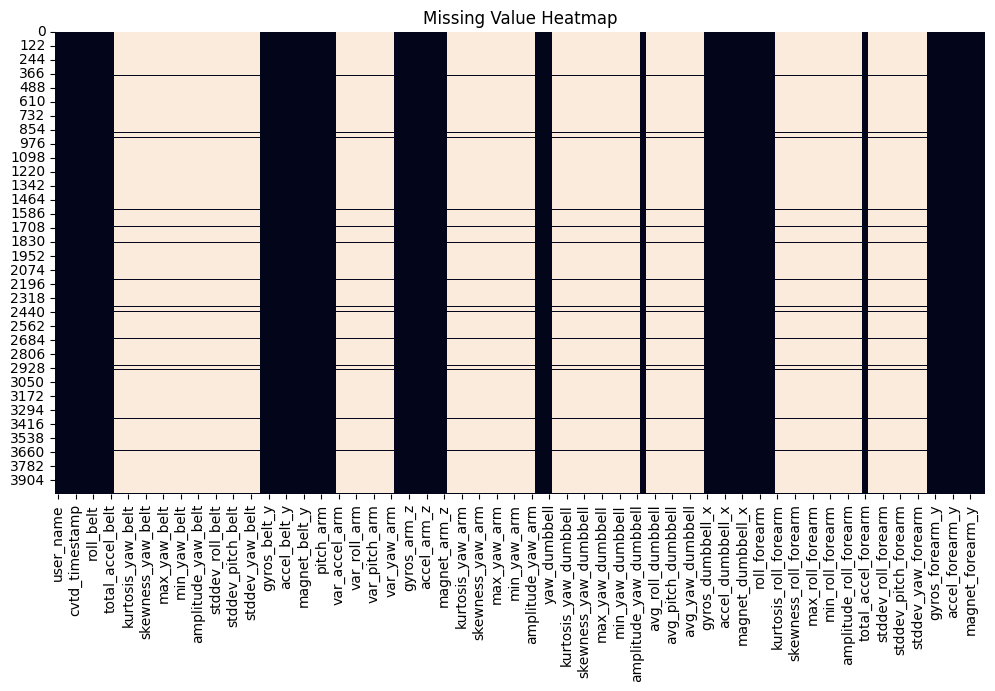

In [8]:
# Visualize missing data
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Value Heatmap")
plt.show()

Given that 100 columns have a large number of null values (3936 out of 4024 rows), dropping columns might be a reasonable approach if those specific features are not crucial for analysis. Alternatively, imputation can be consider, but with such a high percentage of missing values, imputation might not be the best option unless there is a strong reason to keep these columns.

Theses column appear to be the columns that contain statisitcal caculations. "Each IMU has x, y, and z values + euler angles (roll, pitch and yaw). For each time window (1s of data), there are several statistics calculations, like Kurtosis, Variance, etc."

### Handel Missing Values

In [9]:
# Drop columns with >95% missing
sparse_cols = missing_percentage[missing_percentage > 95].index
df.drop(columns=sparse_cols, inplace=True)

# Fill remaining numeric NaNs with median
df.fillna(df.median(numeric_only=True), inplace=True)

print("Remaining missing values:", df.isnull().sum().sum())

Remaining missing values: 0


In [10]:
# Check column data types
print(df.dtypes.head(15))  # Show first 15 columns and their types

# Check number of numeric columns
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
print("Number of numeric columns:", len(numeric_cols))

user_name                object
raw_timestamp_part_1      int64
raw_timestamp_part_2      int64
cvtd_timestamp           object
new_window               object
num_window                int64
roll_belt               float64
pitch_belt              float64
yaw_belt                float64
total_accel_belt          int64
gyros_belt_x            float64
gyros_belt_y            float64
gyros_belt_z            float64
accel_belt_x              int64
accel_belt_y              int64
dtype: object
Number of numeric columns: 55


In [11]:
# Fill remaining missing numeric values with median
df.fillna(df.median(numeric_only=True), inplace=True)

# Confirm no missing values remain
print("Remaining missing values:", df.isnull().sum().sum())

Remaining missing values: 0


In [12]:
#Check unique values
df['classe'].unique()

array(['E', 'A', 'D', 'B', 'C'], dtype=object)

Used ChatGPT to figure out what variable represnets the dependent variable.

OpenAI. (2025a). ChatGPT (July 22 version) [Large language model]. https://chatgpt.com/share/688008be-b13c-800f-8777-77f32c0befe7

The dependent variable (target variable) is classe. Exercise class (A, B, C, D, or E) that a healthcare professional predicted. These are the the variables to predict using the other columns. All other columns (except user_name, timestamps, and IDs) are independent variables (features) used to model or predict.

Drop user_name, raw_timestamp_part_1, raw_timestamp_part_2, cvtd_timestamp, new_window, and num_window because they are not predictive features and don’t carry meaningful information about the exercise type (classe) for a machine learning model.

Timestamps doesn't have a causal relationship with the type of exercise performed they only show the timestamp of when the excercise was taken.

new_window is a categorical flag indicating whether a new window of measurements started (yes or no).

num_window is a a counter for windowed observation. It shows how the dataset was created, not a variable related to the actual exercise performance.

In [13]:
# Drop the columns that are not needed for modeling and predicting
df_dropped = df.drop(columns=['user_name', 'raw_timestamp_part_1',
                                      'raw_timestamp_part_2','cvtd_timestamp',
                                      'new_window', 'num_window'])

# Display the first few rows and the columns and their data types of the new DataFrame
df_dropped.head()
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 53 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   roll_belt             4024 non-null   float64
 1   pitch_belt            4024 non-null   float64
 2   yaw_belt              4024 non-null   float64
 3   total_accel_belt      4024 non-null   int64  
 4   gyros_belt_x          4024 non-null   float64
 5   gyros_belt_y          4024 non-null   float64
 6   gyros_belt_z          4024 non-null   float64
 7   accel_belt_x          4024 non-null   int64  
 8   accel_belt_y          4024 non-null   int64  
 9   accel_belt_z          4024 non-null   int64  
 10  magnet_belt_x         4024 non-null   int64  
 11  magnet_belt_y         4024 non-null   int64  
 12  magnet_belt_z         4024 non-null   int64  
 13  roll_arm              4024 non-null   float64
 14  pitch_arm             4024 non-null   float64
 15  yaw_arm              

In [14]:
df_dropped.shape

(4024, 53)

### Outlier Detection

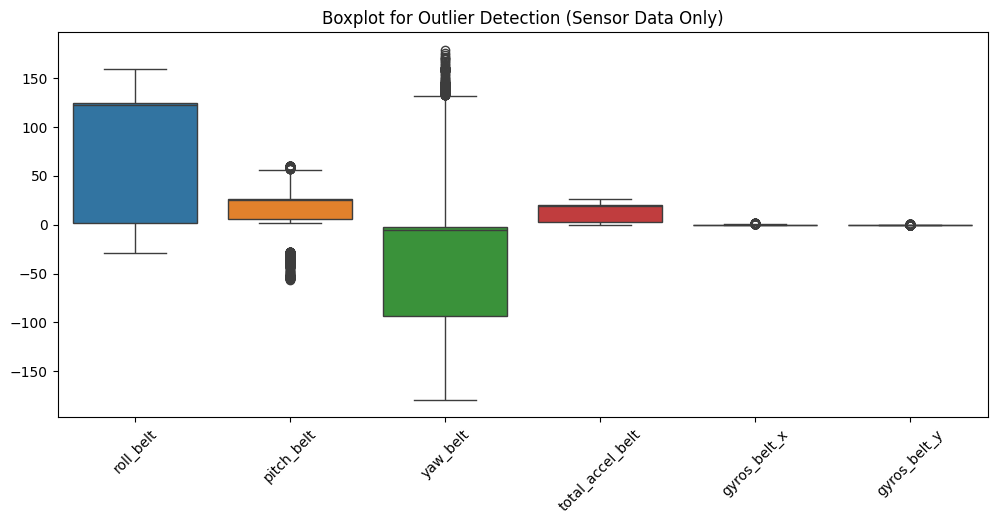

In [15]:
# Define sensor-only numeric columns
sensor_cols = df.drop(columns=[
    'user_name',
    'raw_timestamp_part_1',
    'raw_timestamp_part_2',
    'cvtd_timestamp',
    'num_window'
]).select_dtypes(include=['int64','float64']).columns

# Plot first 6 sensor columns
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
sns.boxplot(data=df[sensor_cols[:6]])
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection (Sensor Data Only)")
plt.show()

### Feature Distributions

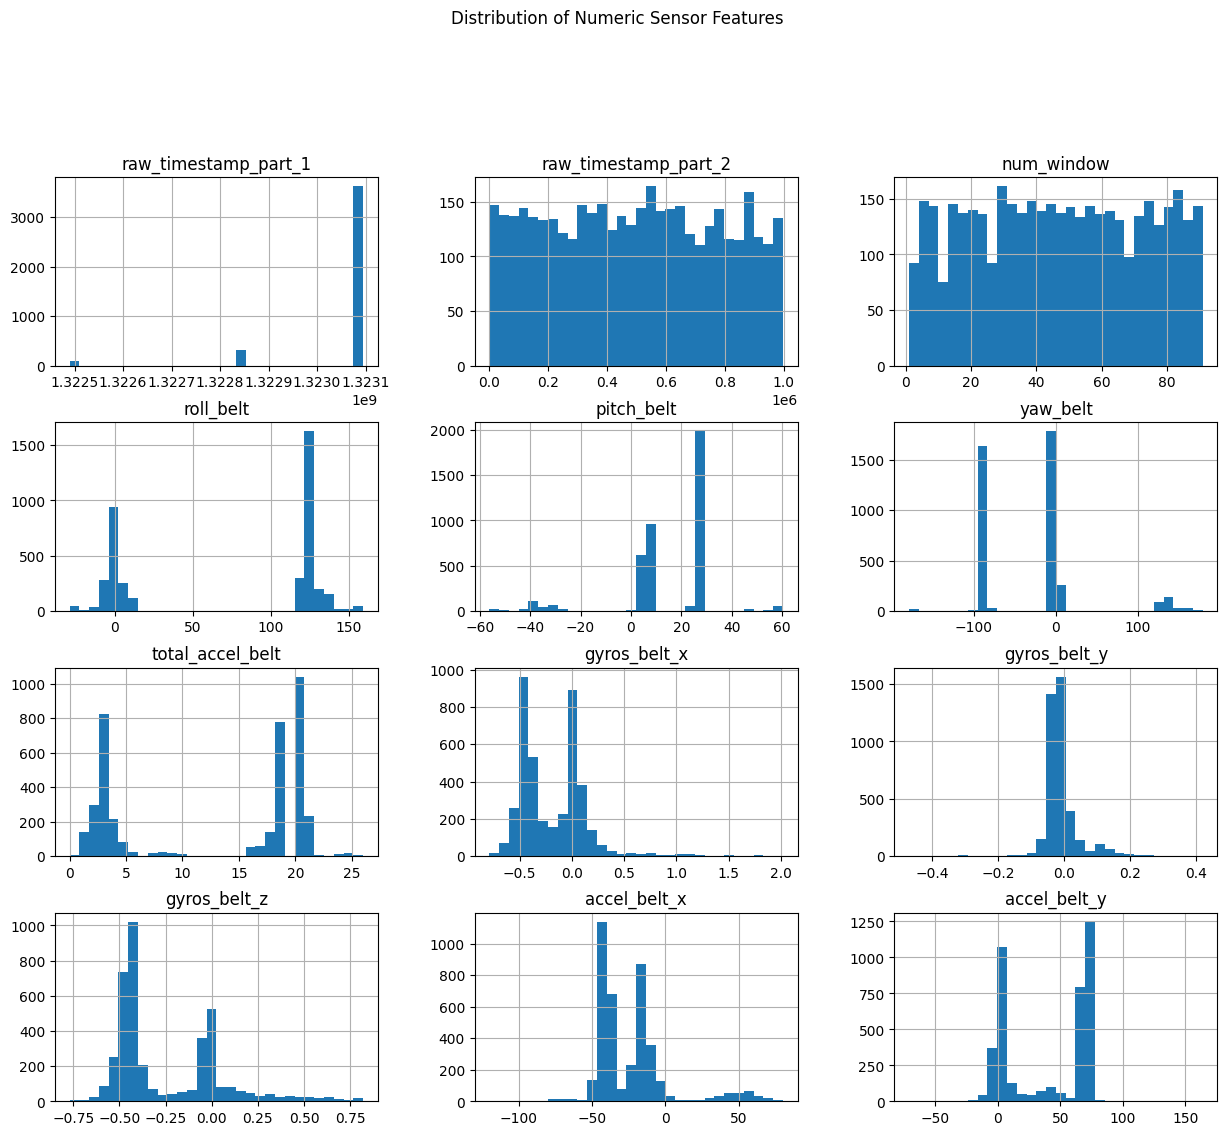

In [16]:
df[numeric_cols[:12]].hist(figsize=(15,12), bins=30)
plt.suptitle("Distribution of Numeric Sensor Features", y=1.02)
plt.show()

### Correlation Analysis

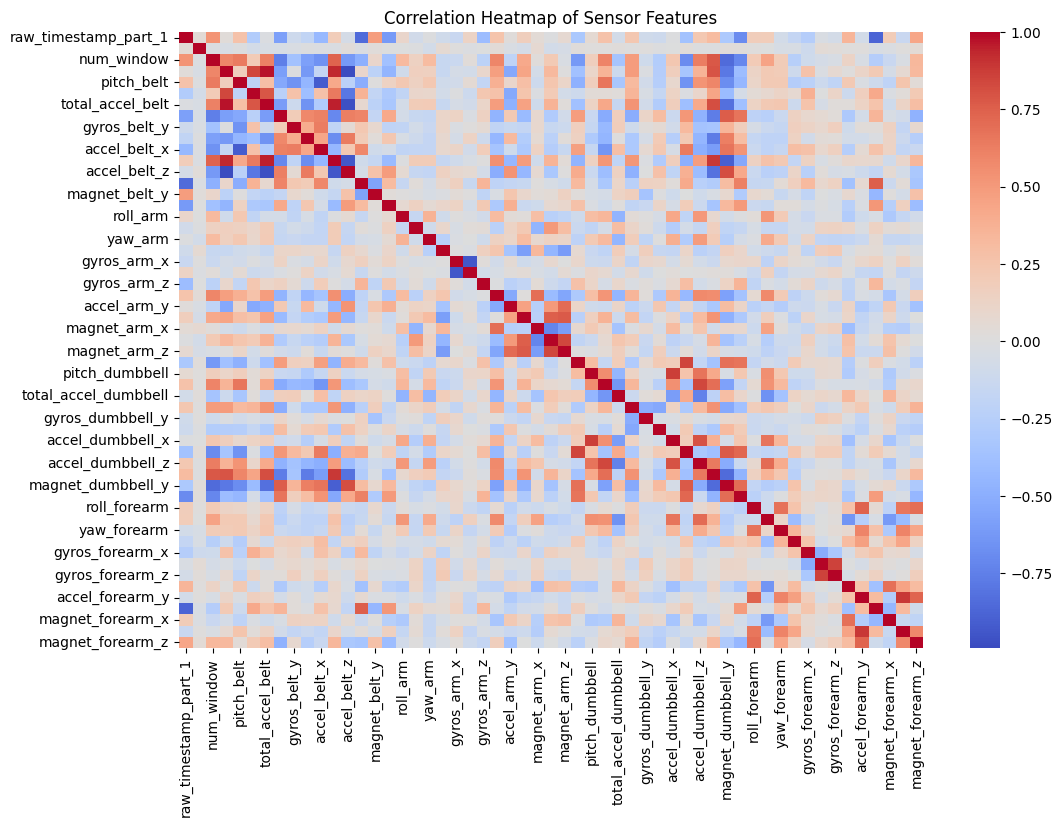

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(df[numeric_cols].corr(), cmap='coolwarm')
plt.title("Correlation Heatmap of Sensor Features")
plt.show()

In [18]:
# Compute correlation matrix
corr_matrix = df_dropped.drop(columns="classe").corr()
#corr_matrix

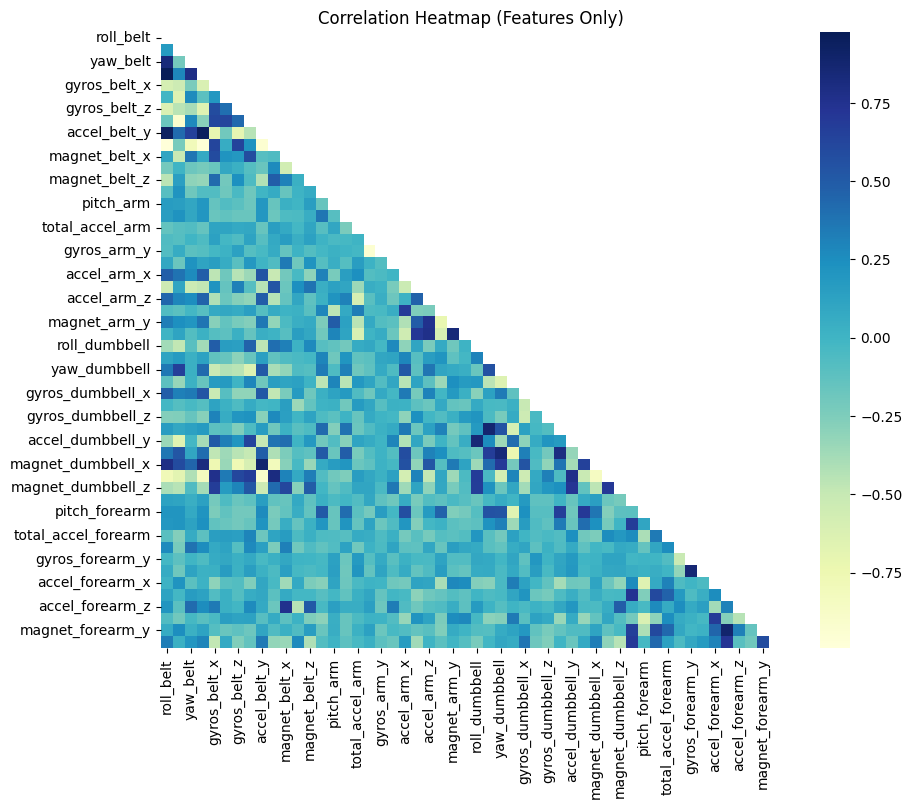

In [19]:
#plot triangle heatmap
# creating mask
mask = np.triu(np.ones_like(corr_matrix))

# plotting a triangle correlation heatmap
plt.figure(figsize=(10, 8))
dataplot = sns.heatmap(corr_matrix, cmap="YlGnBu", mask=mask, fmt=".2f")
plt.title("Correlation Heatmap (Features Only)")
plt.show()

Used ChatGPT to refine ideas about correlated features

OpenAI. (2025b). ChatGPT (July 23 version) [Large language model].https://chatgpt.com/share/68822ff7-4a5c-800f-8b14-6aa931ed7808

There are a few highly correlated features within this dataset. These are the features with correlation grater than or equal to 0.75, although most features fall in the moderate to low correlation range (≤ 0.5). There are several ways to address highly correlated features to reduce multicollinearity:

**Removing Highly Correlated Features**

Removing highly correlated features can simplifie models and reduce redundancy, but there is a risk of losing useful information

**Feature Transformation / Dimensionality Reduction**

Techniques like Principal Component Analysis (PCA) can be used to reduce dimensionality while keeping most variance but, PCA components are less interpretable.

**Regularization Techniques**

Methods such as Lasso (L1) or Ridge (L2) regression will allow the models to learn to down-weight or remove less important features automatically. This option is good for handling correlated features without explicit removal.

**Use Models Less Sensitive to Correlation**

Less sensitive models such as Tree-based models (Random Forest, Gradient Boosting) are generally robust to correlated features. Neural networks can also handle correlated inputs reasonably well.

**Feature Engineering / Domain Knowledge**

Combine correlated features into meaningful new features (e.g., averages, ratios).

**Next Step**

Géron, A.  (2022). *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 3rd Edition*. O'Reilly.

Reducing dimensionality causes some infromation loss, Geron recomends first training system on original data and then consider using dimensionality reduction. (Geron, 2022)

In [20]:
# Rename df.dropped for consistancy
df = df_dropped

# Recalculate numeric columns after dropping
numeric_cols = df.select_dtypes(include=['number']).columns

# Confirm data cleanliness
print("Final shape:", df.shape)
print("Remaining missing values:", df.isnull().sum().sum())
print("Numeric columns:", len(numeric_cols))

# Optional: quick check of target distribution if 'classe' is target
if 'classe' in df.columns:
    print(df['classe'].value_counts())

Final shape: (4024, 53)
Remaining missing values: 0
Numeric columns: 52
classe
E    1370
A    1365
B     901
D     276
C     112
Name: count, dtype: int64


52 numeric column plus 1 target column (classe)

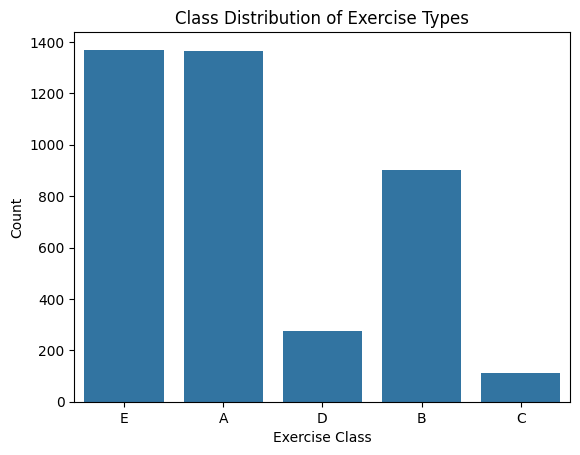

In [21]:
# Plot the value counts
sns.countplot(x=df['classe'])
plt.title("Class Distribution of Exercise Types")
plt.xlabel("Exercise Class")
plt.ylabel("Count")
plt.show()

The dependent variable of this dataset has five categories. These categories are also unbalances. There is a much higher count of classe E (1370) and A (1365) compared to classe D (276) and C (112). Classe B is in between with a count of 901.  

**Questions**
What is the best way to go about balancing these categories? Should one classe be chosen against the others for model predictions?  

ChatGPT answer

OpenAI. (2025c). ChatGPT (July 24 version) [Large language model].https://chatgpt.com/share/6882432c-5d68-800f-bca2-ea2076338187

If the problem can be reframed as a binary classification task then a "one-vs-all" approach where the model predicts C vs. Not-C can be considered. However, if all classes are important the multi-class setup should be retained. Since Classe B, C, and D are not negligible, it may be ideal to retain all 5 classes and handle imbalance via resampling (i.e. libarary imblearn, function SMOTE) or class weighting. Evaluate performance using macro-averaged metrics, because accuracy will be biased toward A and E.

  *Good model choices that handle multiclassification and class imbalance*:

    Tree-based models:

      Random Forest (class_weight="balanced")

      Gradient Boosting (XGBoost, LightGBM, CatBoost)

    Logistic Regression (Multinomial)

    Support Vector Machines (SVM) with a one-vs-one or one-vs-rest strategy (class_weight="balanced")

    Neural Networks

In [22]:
#get data discriptive statistics
df.describe()

,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,...,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,...,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,73.308342,14.158009,-30.974709,12.767644,-0.182284,-0.008837,-0.246446,-24.362823,39.843688,-94.726143,...,34.375000,0.107614,-0.004108,0.093022,-6.444583,171.466203,-162.968936,-348.663767,358.638668,475.231113
std,62.207339,18.766999,64.663731,8.193013,0.318171,0.057817,0.289511,25.528431,33.001362,95.787395,...,6.708725,0.540884,2.267832,0.735418,133.487861,193.468617,80.826582,265.421967,520.255942,293.009818
min,-28.900000,-56.200000,-179.000000,0.000000,-0.790000,-0.470000,-0.770000,-120.000000,-71.000000,-244.000000,...,10.000000,-1.880000,-5.730000,-2.580000,-328.000000,-467.000000,-366.000000,-1160.000000,-725.000000,-876.000000
25%,1.380000,6.220000,-93.100000,3.000000,-0.430000,-0.030000,-0.460000,-42.000000,4.000000,-176.000000,...,30.000000,-0.140000,-1.780000,-0.310000,-117.000000,75.750000,-210.000000,-589.000000,-76.000000,370.750000
50%,122.000000,25.500000,-4.940000,19.000000,-0.240000,-0.020000,-0.410000,-34.000000,65.000000,-166.000000,...,35.000000,0.060000,-0.020000,-0.020000,-6.000000,229.500000,-181.000000,-330.500000,653.000000,560.000000
75%,124.000000,26.400000,-2.695000,20.000000,0.020000,0.000000,-0.020000,-16.000000,70.000000,20.000000,...,37.000000,0.420000,1.830000,0.480000,113.000000,297.000000,-150.000000,-152.000000,747.000000,670.000000
max,159.000000,60.300000,179.000000,26.000000,2.020000,0.420000,0.820000,80.000000,164.000000,77.000000,...,59.000000,1.810000,5.170000,3.350000,279.000000,575.000000,239.000000,413.000000,1440.000000,1040.000000


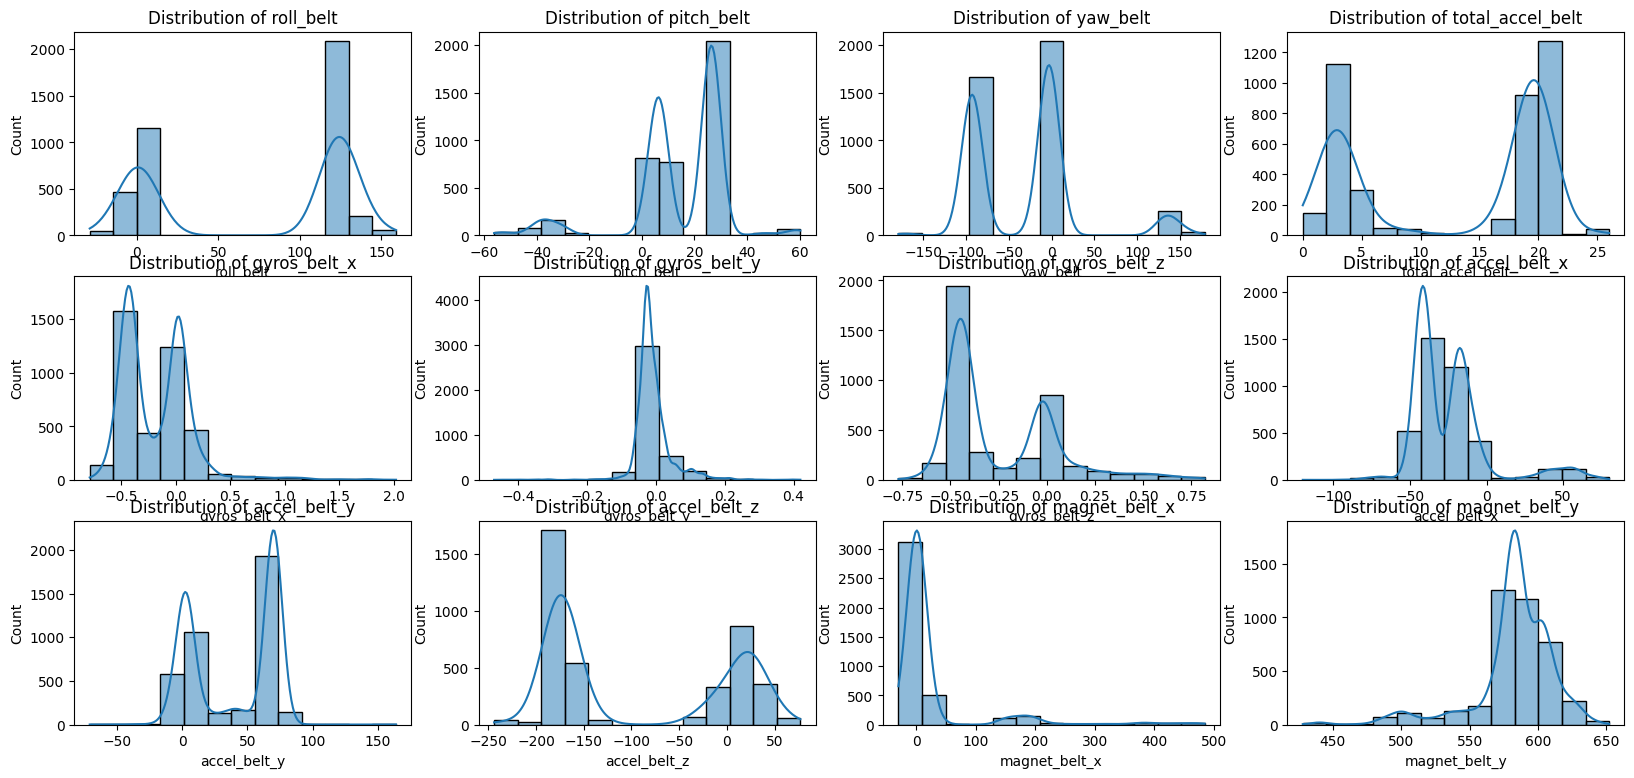

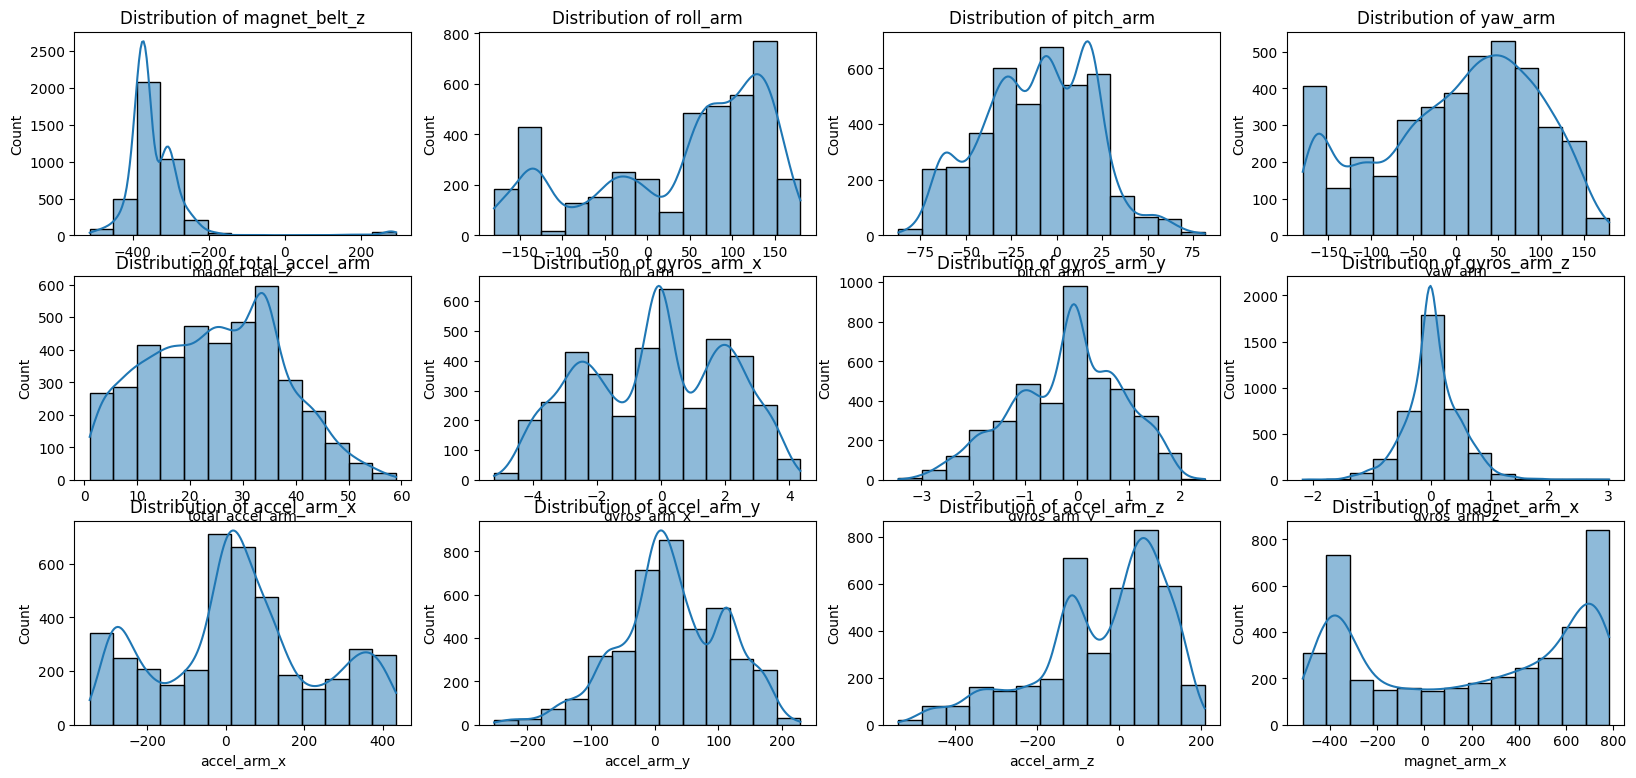

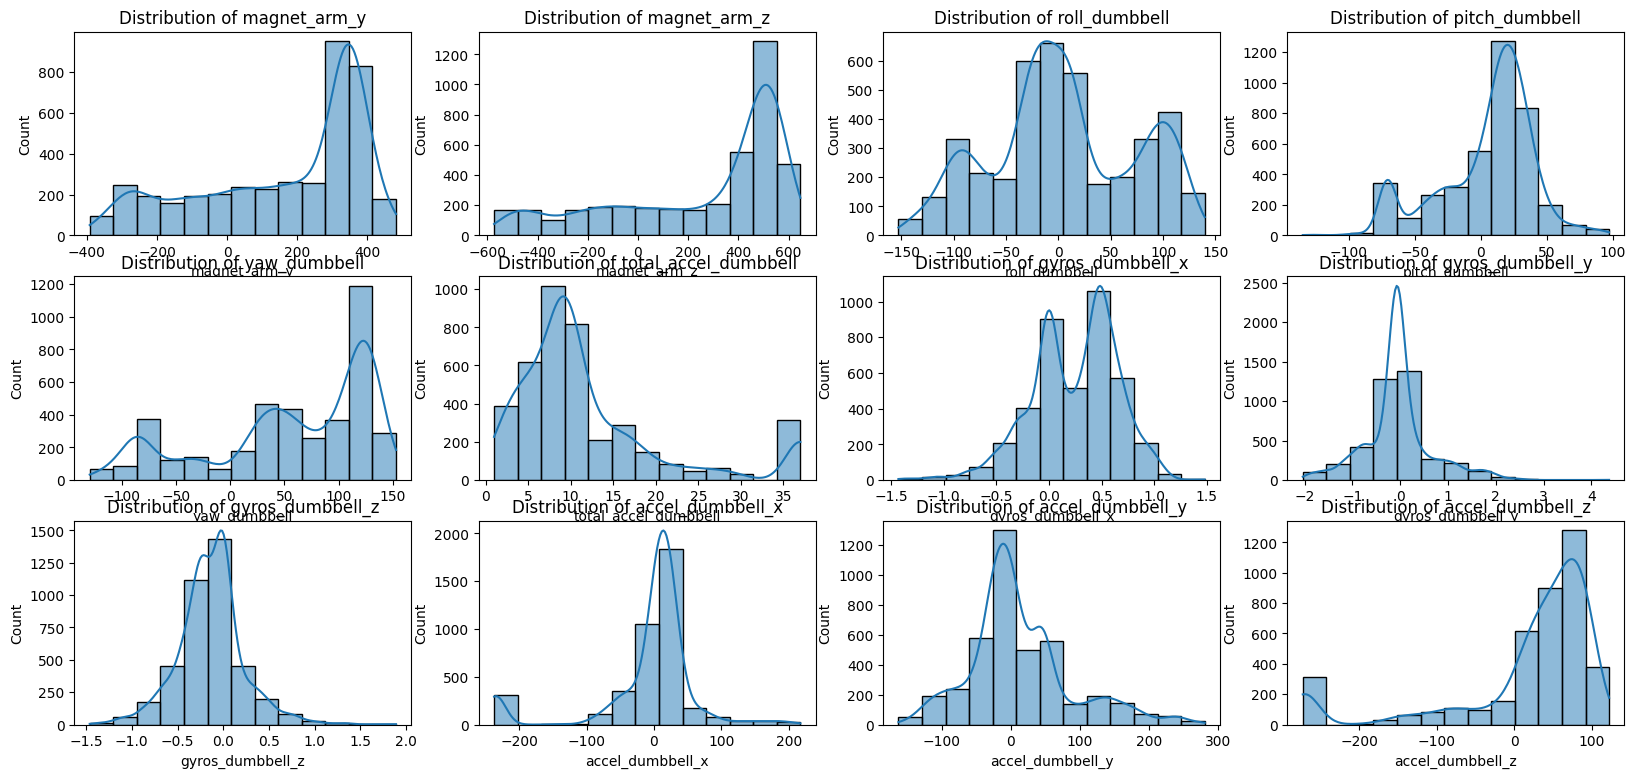

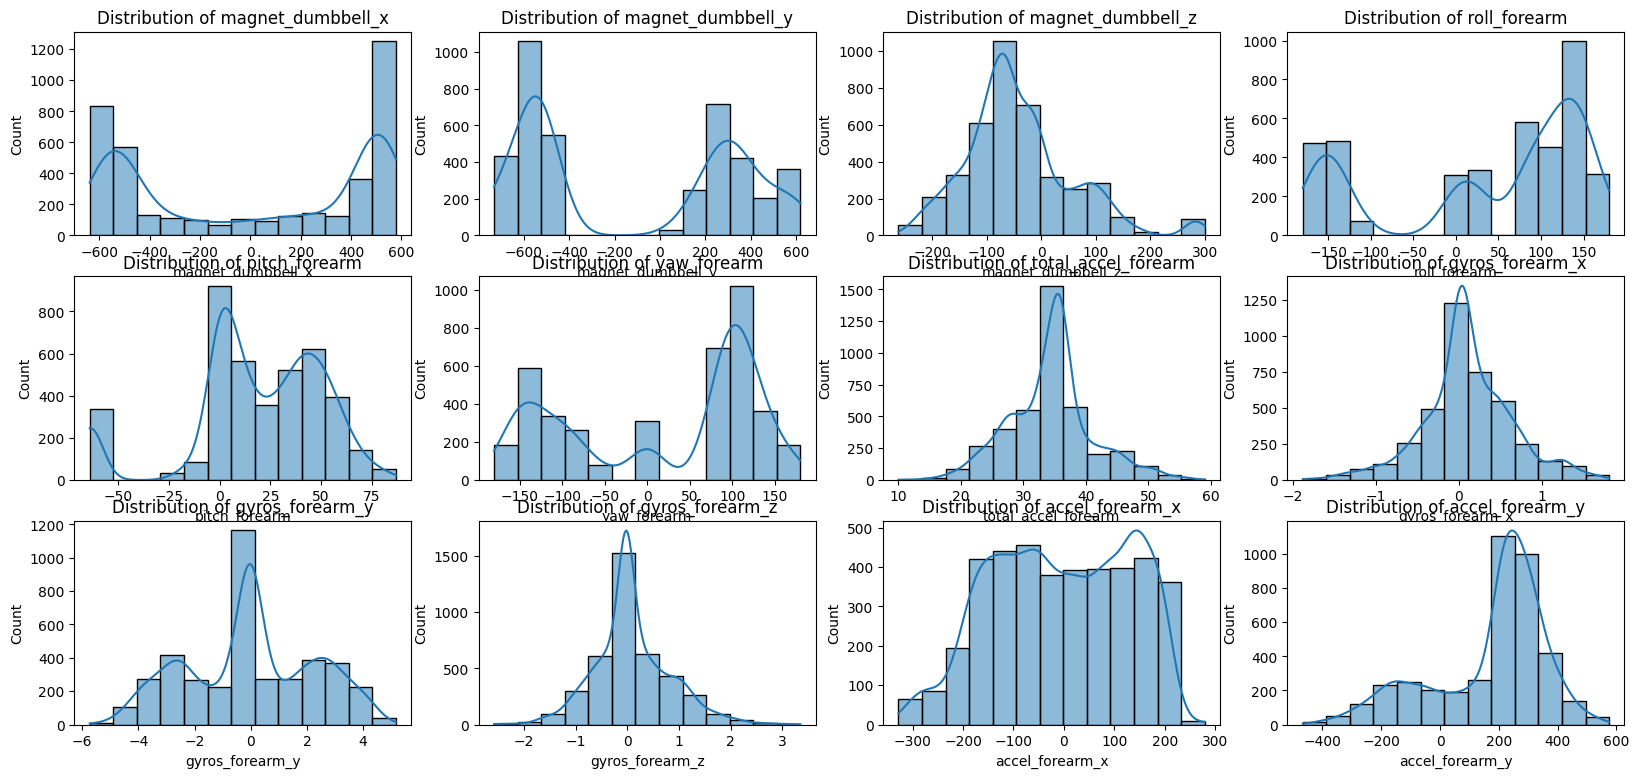

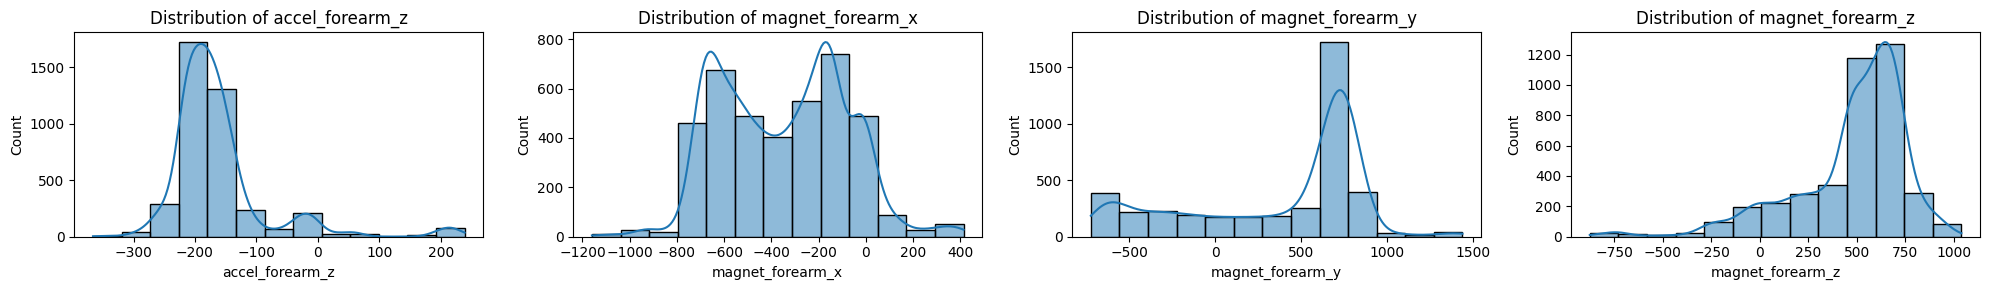

In [23]:
# Histograms for all numerical features
columns = df.drop(columns="classe").columns
plots_per_fig = 12
n_figs = math.ceil(len(columns) / plots_per_fig)

for fig in range(n_figs):
    start = fig * plots_per_fig
    end = start + plots_per_fig
    subset_cols = columns[start:end]

    rows = math.ceil(len(subset_cols) / 4)  # 4 per row
    plt.figure(figsize=(20, 3 * rows))

    for i, col in enumerate(subset_cols):
        plt.subplot(rows, 4, i + 1)
        sns.histplot(df_dropped[col], kde=True, bins=13)
        plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

### Variance Analysis

In [24]:
low_variance = df[numeric_cols].std().sort_values().head(10)
print("Lowest variance features:\n", low_variance)

Lowest variance features:
 gyros_belt_y        0.057817
gyros_belt_z        0.289511
gyros_belt_x        0.318171
gyros_dumbbell_z    0.362490
gyros_dumbbell_x    0.404754
gyros_arm_z         0.488571
gyros_forearm_x     0.540884
gyros_dumbbell_y    0.700889
gyros_forearm_z     0.735418
gyros_arm_y         1.047446
dtype: float64


### Correlation with target (Feature Importance Hint)

In [25]:
# Encode target temporarily if needed
# Not needed for Decision Trees, Random Forests, Gradient Boosting, SVM
# May need for Neural Networks
#from sklearn.preprocessing import LabelEncoder

#if df['classe'].dtype == 'object':
    #df['classe_encoded'] = LabelEncoder().fit_transform(df['classe'])

#cor_target = df[numeric_cols].corrwith(df['classe_encoded'])
#cor_target.sort_values(ascending=False).head(10)

### Sensor Axis Combinations

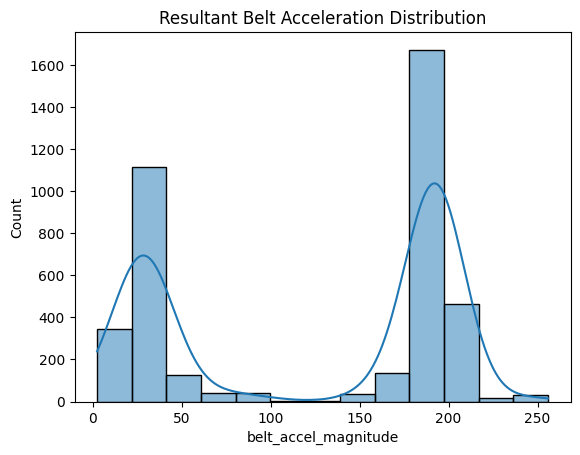

In [26]:
# Combining three directional accelerations into a single overall accelaration value
df['belt_accel_magnitude'] = np.sqrt(
    df['accel_belt_x']**2 + df['accel_belt_y']**2 + df['accel_belt_z']**2
)

sns.histplot(df['belt_accel_magnitude'], kde=True)
plt.title("Resultant Belt Acceleration Distribution")
plt.show()

In [27]:
df.shape

(4024, 54)

New shape after adding belt_accel_magnitude variable

## Pre-Processing

**Balancing Training Data**

In [28]:
# Train Test split
X = df.drop(columns= ['classe'])
labels = df['classe']

# train_test_split here
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.20,random_state= 42)

Used ChatGPT for further understanding on the approprate use casses of one-hot encoding, scaling, and centering.

OpenAI. (2025a). ChatGPT (July 22 version) [Large language model]. https://chatgpt.com/share/688008be-b13c-800f-8777-77f32c0befe7

**One Hot Encodoing**

Decision Trees, Random Forests, Gradient Boosting, SVM, and most scikit-learn models, will not require one-hot encoding the dependent variable classe.

Neural Networks (e.g., Keras/TensorFlow/PyTorch), will require one-hot encode classe.

**Scaling**

Decision Trees and Random Forests will not require Scaling.

Scaling is recomended for Linear Models, SVM, Neural Networks.

**Centering**

Linear Models, SVM, and Nural Networks will need centering

Decision Trees and Ensemble Trees (Random Forest, Gradient Boosting) will not need centering.

**Best Approach**

Keep an unscaled dataset copy of the raw dataset for reporting or interpretation of trees. Create a scaled + centered version for model trianing.

In [29]:
# Centering and Scaling
scaler = StandardScaler()  # centers to mean=0, scales to variance=1
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
# wrap back into DataFrame to keep column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [31]:
# Balance
sm = SMOTE(random_state=42)
X_train_scaled_bal, y_train_bal = sm.fit_resample(X_train_scaled, y_train)

**Dimensionality reduction**

Principle Component Analysis

In [32]:
# Principle Component Analysis
# Test 1-20 components
n_components = range(1,41)

# analyze the reconstruction error and explained variance
explained_var_list = []
recon_error_list = []

for n in n_components:
  pca = PCA(n_components=n)
  pca.fit(X_train_scaled_bal)
  explained_var_list.append(np.sum(pca.explained_variance_ratio_))

  X_proj = pca.transform(X)
  X_reconstructed = pca.inverse_transform(X_proj)
  mse = mean_squared_error(X, X_reconstructed)
  recon_error_list.append(mse)

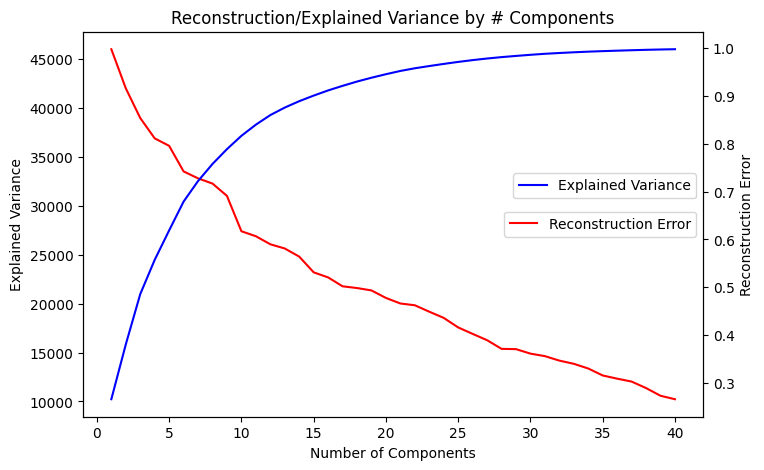

In [33]:
# Form the recunstruction Error here:
rec_error = pd.DataFrame({'n_components': n_components,
'reconst error': recon_error_list,
'explained var ratio': explained_var_list})

# Plot it here:
fig, ax = plt.subplots(figsize =(8,5))
sns.lineplot(data=rec_error, x='n_components', y='reconst error', ax=ax,color='red', label='Reconstruction Error')

# Use twin Axes here:
ax2 = ax.twinx()
sns.lineplot(data=rec_error, x='n_components', y= 'explained var ratio',ax=ax2, color= 'blue', label= 'Explained Variance' )

ax.legend(loc='center right')
ax2.legend(loc='center right', bbox_to_anchor=(1, 0.6))

plt.title('Reconstruction/Explained Variance by # Components')
ax.set_xlabel('Number of Components')
ax.set_ylabel('Explained Variance')
ax2.set_ylabel('Reconstruction Error')
plt.show()

Use the explained variance curve as the main guide.

Explained Variance continues to increase but levels off gradually around 30 components. At 20 components ~90% of the variance is captured. At about 30 components ~95-97% of the varaince is captured.

Reconstruction Error drops rapidly around 5-10 components. The major data structures are captured quickly. Beyond 20 components, reconstruction errror continues to decrease but more slowly.

The two lines intersect at about 5 to 6 components. This is where both components start rapidly imporving together.

The next step is to test 20, 25, 30, and 35 componets for an increase in predictive accuracy. Although reconstruction error is low more components are needed to capture enough detail for accurate class prediction.



In [34]:
components_to_test = [5, 10, 15, 20, 25, 30, 35]
results = []

for n in components_to_test:
    #Apply PCA
    pca = PCA(n_components=n, random_state=42)
    X_pca = pca.fit_transform(X_train_scaled_bal)

    # Train a Random Forest classifier as a diagnositc tool
    rf = RandomForestClassifier(random_state=42)
    rf_scores = cross_val_score(rf, X_pca, y_train_bal, cv=5, scoring='f1_macro')

    # Gradient Boosting Classifier
    gb = GradientBoostingClassifier(random_state=42)
    gb_scores = cross_val_score(gb, X_pca, y_train_bal, cv=5, scoring='f1_macro')

    # K-Nearest Neighbors
    knn = KNeighborsClassifier()
    knn_scores = cross_val_score(knn, X_pca, y_train_bal, cv=5, scoring='f1_macro')

    results.append({
        'Components': n,
        'RF Mean F1 Score': np.mean(rf_scores),
        'RF Std F1 Score': np.std(rf_scores),
        'GB Mean F1 Score': np.mean(gb_scores),
        'GB Std F1 Score': np.std(gb_scores),
        'KNN Mean F1 Score': np.mean(knn_scores),
        'KNN Std F1 Score': np.std(knn_scores)
    })

results_df = pd.DataFrame(results)
results_df

,Components,RF Mean F1 Score,RF Std F1 Score,GB Mean F1 Score,GB Std F1 Score,KNN Mean F1 Score,KNN Std F1 Score
0,5,0.987343,0.003381,0.968248,0.002926,0.984432,0.004388
1,10,0.996205,0.002092,0.989866,0.003106,0.995662,0.001843
2,15,0.998373,0.000885,0.993853,0.002516,0.998011,0.000888
3,20,0.999277,0.000676,0.994217,0.002184,0.998192,0.000991
4,25,0.998375,0.001053,0.994757,0.002244,0.998554,0.001085
5,30,0.999096,0.000572,0.996385,0.002490,0.998373,0.000677
6,35,0.999277,0.000676,0.996927,0.001946,0.998373,0.000677


FRandom Forest and KNN: the models reach near perfect F1 scores by 20 componets with no meaningful improvement. Standard deviation is low.

Gradient Boosting: Improves from 5 to 35 components. Best performance at 35 components. Improvements are small from 20 to 35 components.

20 components gives excellent perfromance across models.

PCA analysis proved that 20 principal components provide optimal performance. PCA will reduce the effects of multicollinearity.

Linear Discriminant Analysis

Check to see if LDA is performs better for a diminsinality reduction technique.

In [35]:
lda_components_to_test = [1, 2, 3, 4]
results_lda = []

for n in lda_components_to_test:
    lda = LDA(n_components=n)
    X_lda = lda.fit_transform(X_train_scaled_bal, y_train_bal)

    # Random Forest
    rf = RandomForestClassifier(random_state=42)
    rf_scores = cross_val_score(rf, X_lda, y_train_bal, cv=5, scoring='f1_macro')

    # Gradient Boosting
    gb = GradientBoostingClassifier(random_state=42)
    gb_scores = cross_val_score(gb, X_lda, y_train_bal, cv=5, scoring='f1_macro')

    # KNN
    knn = KNeighborsClassifier()
    knn_scores = cross_val_score(knn, X_lda, y_train_bal, cv=5, scoring='f1_macro')

    results_lda.append({
        'Components': n,
        'RF Mean F1 Score': np.mean(rf_scores),
        'RF Std F1 Score': np.std(rf_scores),
        'GB Mean F1 Score': np.mean(gb_scores),
        'GB Std F1 Score': np.std(gb_scores),
        'KNN Mean F1 Score': np.mean(knn_scores),
        'KNN Std F1 Score': np.std(knn_scores)
    })

results_lda_df = pd.DataFrame(results_lda)
results_lda_df

,Components,RF Mean F1 Score,RF Std F1 Score,GB Mean F1 Score,GB Std F1 Score,KNN Mean F1 Score,KNN Std F1 Score
0,1,0.566747,0.004043,0.649342,0.013593,0.604330,0.010639
1,2,0.869647,0.007592,0.867809,0.010215,0.861076,0.003555
2,3,0.946213,0.008550,0.939332,0.007229,0.938742,0.006404
3,4,0.987711,0.002892,0.985177,0.002042,0.987159,0.003542


PCA → unsupervised; keeps more total variance; can use many components.

LDA → supervised; fewer components (max = classes – 1) but more targeted separation.

LDA 4 components:	F1 scores > 0.98 across RF, GB, KNN. PCA needed ~20 components to reach similar performance. LDA with fewer components (1–3)	has steep performance improvement.	PCA gradually improved with more components.

With enough components PCA and LDA reach identical f1 scores across models. Gradient boositng shows a slower climb with LDA. LDA is supervised, it uses class labels to find the axes that best separate classes. LDA may maximum compression with minimal drop in performance by using 4 dimensions vs. 15-20 for PCA.

For this data set models RF, GB, and KNN perform near-perfect even without dimension reduction. Will use original features for modeling.

## Modeling Methods and Validation

### Decision Tree

In [36]:
# Train model
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42, max_depth=5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)

### Linear Modeling

Used ChatGPT for further understaninding of code and results

OpenAI. (2025d). ChatGPT (July 26 version) [Large language model].https://chatgpt.com/share/6882432c-5d68-800f-bca2-ea2076338187

**SGDClassifier**

*Log Loss*

supports multinomial classification (multi_class='multinomial')

In [37]:
# Log Loss L1 Regularization

#Hyperparameter tuning

alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
results_l1 = []

for a in alphas:
  l1clf = Pipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('clf', SGDClassifier(loss='log_loss', penalty='l1', alpha=a, random_state=42))
    ])
  print('Finished training, alpha=%f' % a)
  l1cv = cross_val_score(l1clf, X_train, y_train, cv=5, scoring='f1_macro',n_jobs=-1)
  print('Finished 5-fold CV, alpha=%f' % a)
  results_l1.append({'alpha': a, 'log L1': l1cv.mean()}) # append 'alpha' and 'log L1'
l1_f1 = pd.DataFrame(results_l1)

Finished training, alpha=0.000010
Finished 5-fold CV, alpha=0.000010
Finished training, alpha=0.000100
Finished 5-fold CV, alpha=0.000100
Finished training, alpha=0.001000
Finished 5-fold CV, alpha=0.001000
Finished training, alpha=0.010000
Finished 5-fold CV, alpha=0.010000
Finished training, alpha=0.100000
Finished 5-fold CV, alpha=0.100000
Finished training, alpha=1.000000
Finished 5-fold CV, alpha=1.000000
Finished training, alpha=10.000000
Finished 5-fold CV, alpha=10.000000
Finished training, alpha=100.000000
Finished 5-fold CV, alpha=100.000000
Finished training, alpha=1000.000000
Finished 5-fold CV, alpha=1000.000000


In [38]:
l1_f1

,alpha,log L1
0,0.00001,0.993218
1,0.00010,0.986216
2,0.00100,0.975801
3,0.01000,0.899143
4,0.10000,0.533722
5,1.00000,0.035933
6,10.00000,0.048476
7,100.00000,0.038890
8,1000.00000,0.038890


In [39]:
# Log Loss L2 Regularization

results_l2 = []
for a in alphas:
  l2clf = Pipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('clf', SGDClassifier(loss='log_loss', penalty='l2', alpha=a, random_state=42))
    ])
  print('Finished training, alpha=%f' % a)
  l2cv = cross_val_score(l2clf, X_train, y_train, cv=5, scoring='f1_macro',n_jobs=-1)
  print('Finished 5-fold CV, alpha=%f' % a)
  results_l2.append({'alpha': a, 'log L2': l2cv.mean()}) # append 'alpha' and 'log L2'
l2_f1 = pd.DataFrame(results_l2)

Finished training, alpha=0.000010
Finished 5-fold CV, alpha=0.000010
Finished training, alpha=0.000100
Finished 5-fold CV, alpha=0.000100
Finished training, alpha=0.001000
Finished 5-fold CV, alpha=0.001000
Finished training, alpha=0.010000
Finished 5-fold CV, alpha=0.010000
Finished training, alpha=0.100000
Finished 5-fold CV, alpha=0.100000
Finished training, alpha=1.000000
Finished 5-fold CV, alpha=1.000000
Finished training, alpha=10.000000
Finished 5-fold CV, alpha=10.000000
Finished training, alpha=100.000000
Finished 5-fold CV, alpha=100.000000
Finished training, alpha=1000.000000
Finished 5-fold CV, alpha=1000.000000


In [40]:
l2_f1

,alpha,log L2
0,0.00001,0.984027
1,0.00010,0.972996
2,0.00100,0.957266
3,0.01000,0.894353
4,0.10000,0.737628
5,1.00000,0.570623
6,10.00000,0.318796
7,100.00000,0.283220
8,1000.00000,0.279442


In [41]:
# Log Loss Elastic Net

# unbalanced data
results_elnet = []
for a in alphas:
  elnetclf = Pipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('clf', SGDClassifier(loss='log_loss', penalty='elasticnet', alpha=a, random_state=42))
    ])
  print('Finished training, alpha=%f' % a)
  elnetcv = cross_val_score(elnetclf, X_train, y_train, cv=5, scoring='f1_macro',n_jobs=-1)
  print('Finished 5-fold CV, alpha=%f' % a)
  results_elnet.append({'alpha': a, 'log elnet': elnetcv.mean()}) # append 'alpha' and 'log elnet'
elnet_f1 = pd.DataFrame(results_elnet)

Finished training, alpha=0.000010
Finished 5-fold CV, alpha=0.000010
Finished training, alpha=0.000100
Finished 5-fold CV, alpha=0.000100
Finished training, alpha=0.001000
Finished 5-fold CV, alpha=0.001000
Finished training, alpha=0.010000
Finished 5-fold CV, alpha=0.010000
Finished training, alpha=0.100000
Finished 5-fold CV, alpha=0.100000
Finished training, alpha=1.000000
Finished 5-fold CV, alpha=1.000000
Finished training, alpha=10.000000
Finished 5-fold CV, alpha=10.000000
Finished training, alpha=100.000000
Finished 5-fold CV, alpha=100.000000
Finished training, alpha=1000.000000
Finished 5-fold CV, alpha=1000.000000


In [42]:
elnet_f1

,alpha,log elnet
0,0.00001,0.989552
1,0.00010,0.978345
2,0.00100,0.956745
3,0.01000,0.891578
4,0.10000,0.683190
5,1.00000,0.292966
6,10.00000,0.048476
7,100.00000,0.038890
8,1000.00000,0.038890


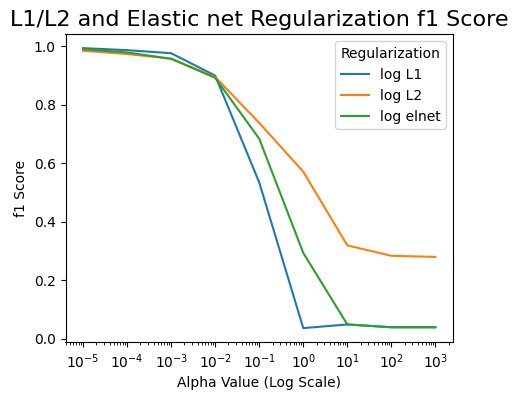

In [43]:
# Create an appropriate plot of L1/L2 and Elastic Net

plt.figure(figsize=(5, 4))
sns.lineplot(x='alpha', y='log L1', data=l1_f1, label='log L1')
sns.lineplot(x='alpha', y='log L2', data=l2_f1, label='log L2')
sns.lineplot(x='alpha', y= 'log elnet', data=elnet_f1, label='log elnet')
plt.xscale('log')
plt.legend(title='Regularization')
plt.title('L1/L2 and Elastic net Regularization f1 Score', size=16)
plt.xlabel('Alpha Value (Log Scale)')
plt.ylabel('f1 Score')
plt.show()

All three penalties start with a high f1 score for small alpha values. The model fits well with minimal regularizatiin. At high alpha values f1 score drops, suggesting that too much regularization hurts the model. L2 has a gradual drop in f1 score as alpha level gets larger and L1 and Elastic net have a faster drop. All penalties perform poorly when alpha is greater than 1. L2 appreas to be more stable in this case.

In [44]:
# Train the best fit log loss lienar model

best_alpha = 0.00001
linear_model_LL = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('clf', SGDClassifier(
        loss='log_loss',
        penalty='l2',
        alpha=best_alpha,
        class_weight=None,
        random_state=42
    ))
])

linear_model_LL.fit(X_train, y_train)

linear_model_LL

Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('clf',
                 SGDClassifier(alpha=1e-05, loss='log_loss', random_state=42))])

**Perceptron**

In [45]:
# Perceptron with L1 penalty
results_perceptron_l1 = []
for a in alphas:
    clf = Pipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('clf', SGDClassifier(loss='perceptron', penalty='l1', alpha=a, random_state=42))
    ])
    print('Finished training, alpha=%f' % a)
    score = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1_macro', n_jobs=-1)
    print('Finished 5-fold CV, alpha=%f' % a)
    results_perceptron_l1.append({'alpha': a, 'f1_macroperceptron_l1': score.mean()})

perceptron_l1 = pd.DataFrame(results_perceptron_l1)

Finished training, alpha=0.000010
Finished 5-fold CV, alpha=0.000010
Finished training, alpha=0.000100
Finished 5-fold CV, alpha=0.000100
Finished training, alpha=0.001000
Finished 5-fold CV, alpha=0.001000
Finished training, alpha=0.010000
Finished 5-fold CV, alpha=0.010000
Finished training, alpha=0.100000
Finished 5-fold CV, alpha=0.100000
Finished training, alpha=1.000000
Finished 5-fold CV, alpha=1.000000
Finished training, alpha=10.000000
Finished 5-fold CV, alpha=10.000000
Finished training, alpha=100.000000
Finished 5-fold CV, alpha=100.000000
Finished training, alpha=1000.000000
Finished 5-fold CV, alpha=1000.000000


In [46]:
# Perceptron with L2 penalty
results_perceptron_l2 = []

for a in alphas:
    clf = Pipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('clf', SGDClassifier(loss='perceptron', penalty='l2', alpha=a, random_state=42))
    ])
    print('Finished training, alpha=%f' % a)
    cv_score = cross_val_score(clf, X_train, y_train, cv=5,scoring='f1_macro', n_jobs=-1)
    print('Finished 5-fold CV, alpha=%f' % a)
    results_perceptron_l2.append({'alpha': a, 'f1_macroperceptron_l2': cv_score.mean()})

perceptron_l2 = pd.DataFrame(results_perceptron_l2)

Finished training, alpha=0.000010
Finished 5-fold CV, alpha=0.000010
Finished training, alpha=0.000100
Finished 5-fold CV, alpha=0.000100
Finished training, alpha=0.001000
Finished 5-fold CV, alpha=0.001000
Finished training, alpha=0.010000
Finished 5-fold CV, alpha=0.010000
Finished training, alpha=0.100000
Finished 5-fold CV, alpha=0.100000
Finished training, alpha=1.000000
Finished 5-fold CV, alpha=1.000000
Finished training, alpha=10.000000
Finished 5-fold CV, alpha=10.000000
Finished training, alpha=100.000000
Finished 5-fold CV, alpha=100.000000
Finished training, alpha=1000.000000
Finished 5-fold CV, alpha=1000.000000


In [47]:
# merge dataframes
merged = pd.merge(perceptron_l1, perceptron_l2, on='alpha', suffixes=('Perceptron L1', 'Perceptron L2'))
merged

,alpha,f1_macroperceptron_l1,f1_macroperceptron_l2
0,0.00001,0.992822,0.987380
1,0.00010,0.987737,0.975800
2,0.00100,0.980391,0.945900
3,0.01000,0.882675,0.914714
4,0.10000,0.228455,0.869756
5,1.00000,0.044789,0.797546
6,10.00000,0.048476,0.405383
7,100.00000,0.038890,0.282656
8,1000.00000,0.038890,0.282865


Choose alpha = 0.0001 with penalty='l1' as your final Perceptron

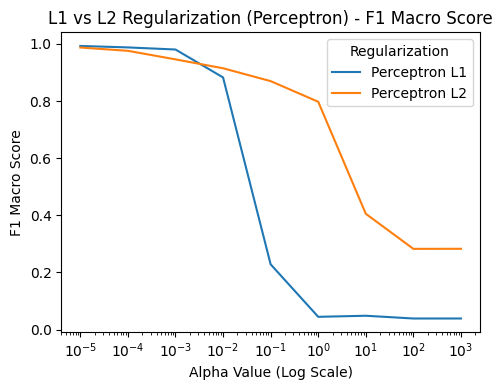

In [48]:
plt.figure(figsize=(5, 4))
sns.lineplot(x='alpha', y='f1_macroperceptron_l1', data=merged, label='Perceptron L1')
sns.lineplot(x='alpha', y='f1_macroperceptron_l2', data=merged, label='Perceptron L2')
plt.xscale('log')
plt.legend(title='Regularization')
plt.title('L1 vs L2 Regularization (Perceptron) - F1 Macro Score')
plt.xlabel('Alpha Value (Log Scale)')
plt.ylabel('F1 Macro Score')
plt.tight_layout()
plt.show()

L1 and L2 perform identically with F1= 1, minimal regularization produces a good classification performance.

L2 outperforms L1 at moderate alpha values (0.1 to 10). L1 drops sharply after 0.1. Too much regularization will penalize weights.

L2 degrades more gracefully than L1 and may be the best choice for regularization.

In [49]:
# Train the best fit perceptron lienar model

best_alpha = 0.0001 # choose a small alpha 0.00001 or 0.0001
linear_model_P = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('clf', SGDClassifier(
        loss='perceptron',
        penalty='l2',
        alpha=best_alpha,
        class_weight=None,
        random_state=42
    ))
])

linear_model_P.fit(X_train, y_train)

linear_model_P

Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('clf', SGDClassifier(loss='perceptron', random_state=42))])

### Ensemble Modeling

**Random Forests**

Random Forest Accuracy: 0.9897727272727274

Classification Report:
               precision    recall  f1-score   support

           A       1.00      1.00      1.00       258
           B       0.99      0.99      0.99       176
           C       1.00      0.95      0.98        22
           D       1.00      1.00      1.00        54
           E       1.00      1.00      1.00       295

    accuracy                           1.00       805
   macro avg       1.00      0.99      0.99       805
weighted avg       1.00      1.00      1.00       805



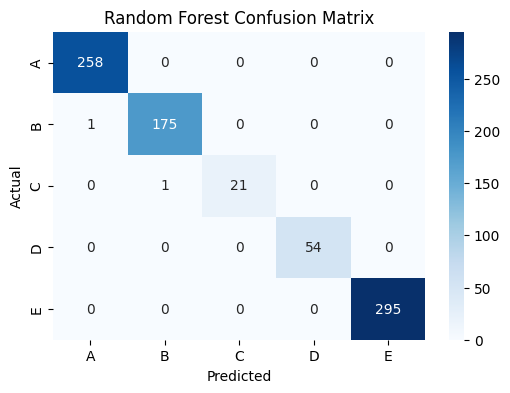

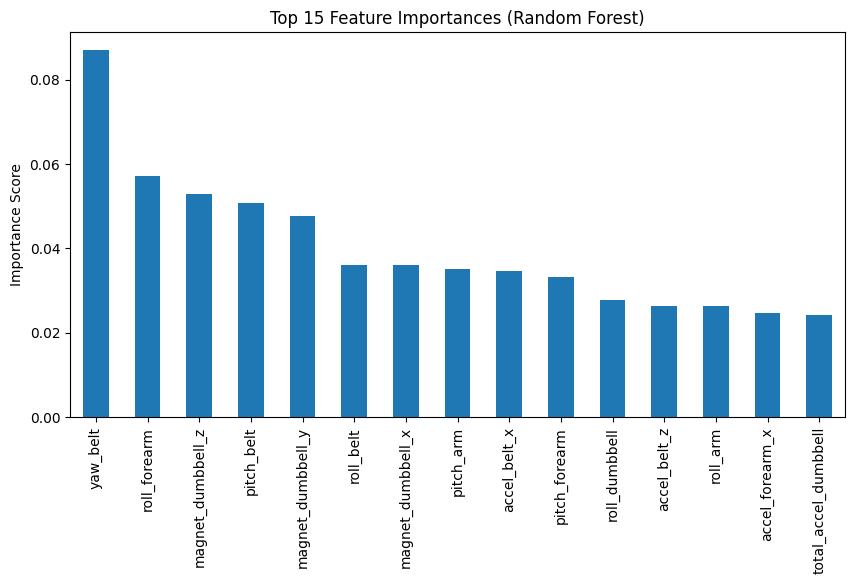

In [50]:
# Random Forest Model
rf = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ))
])
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Heatmap
plt.figure(figsize=(6,4))
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance Visualization
# Access the RandomForestClassifier inside the pipeline
rf_model = rf.named_steps['rf']
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(10,5))
top_features.plot(kind='bar')
plt.title("Top 15 Feature Importances (Random Forest)")
plt.ylabel("Importance Score")
plt.show()


k-fold Cross Validation

In [51]:
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, n_jobs=-1)
print("Cross-validation accuracies:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation accuracies: [0.9984472  1.         1.         0.9984472  0.99844479]
Mean CV Accuracy: 0.999067839996909


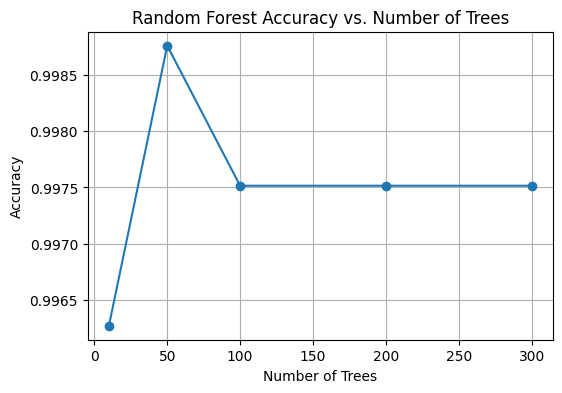

In [52]:
trees = [10, 50, 100, 200, 300]
accuracies = []

for n in trees:
    model = RandomForestClassifier(n_estimators=n, random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    accuracies.append(acc)

plt.figure(figsize=(6,4))
plt.plot(trees, accuracies, marker='o')
plt.title("Random Forest Accuracy vs. Number of Trees")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

Adding more trees past ~50 doesn't improve accuracy

Cumulative Feature Importance Plot

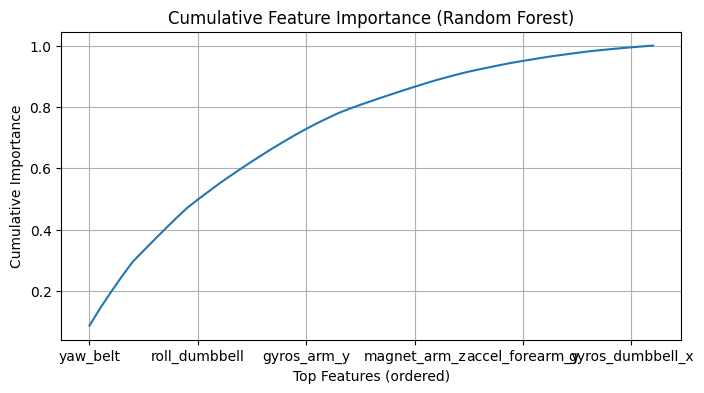

In [53]:
sorted_importances = importances.sort_values(ascending=False)
cumulative_importance = sorted_importances.cumsum()

plt.figure(figsize=(8,4))
cumulative_importance.plot()
plt.title("Cumulative Feature Importance (Random Forest)")
plt.xlabel("Top Features (ordered)")
plt.ylabel("Cumulative Importance")
plt.grid(True)
plt.show()

Inclusing 5-8 features accounts for ~80 to 90% of the total importnace. The rest of the features have a smaller contribution.

In [54]:
rf_model = RandomForestClassifier(n_estimators=50,class_weight='balanced', random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=50, n_jobs=-1,
                       random_state=42)

**Gradient Boosting**

In [55]:
# Prepare pipeline
gb = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state= 42)),
    ('gb', GradientBoostingClassifier(random_state=42))
])

# Define the parameter grid
param_grid = {
    'gb__n_estimators': [50, 100],
    'gb__learning_rate': [0.01, 0.1],
    'gb__max_depth': [2, 3, 4],
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=gb,param_grid=param_grid,
                           cv=5,scoring='f1_weighted',n_jobs=-1
)

# Fit to data
grid_search.fit(X_train, y_train)

# Display the best combination
print("Best parameters:", grid_search.best_params_)
print("Best F1 score:", grid_search.best_score_)


Best parameters: {'gb__learning_rate': 0.1, 'gb__max_depth': 3, 'gb__n_estimators': 100}
Best F1 score: 0.9993773091947139


In [56]:
# Fit the best model from grid search
gbrt = grid_search.best_estimator_

**K-NN**

In [57]:
# List of odd k values
k_vals = list(range(1, 26, 2))
results_knn = []

# loop to test k-vals
for k in k_vals:
    knn = Pipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('knn', KNeighborsClassifier(n_neighbors=k))
    ])

    # Use cross-validation on training data
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='f1_macro')

    results_knn.append({
        'k': k,
        'mean_f1_weighted': scores.mean(),
        'std_f1_weighted': scores.std()
    })

In [58]:
# Store results in a DataFrame
knn_results_df = pd.DataFrame(results_knn)
knn_results_df

,k,mean_f1_weighted,std_f1_weighted
0,1,0.998915,0.001329
1,3,0.997012,0.003088
2,5,0.993958,0.006962
3,7,0.986863,0.007573
4,9,0.975438,0.013615
5,11,0.966566,0.016920
6,13,0.958436,0.019082
7,15,0.949142,0.021312
8,17,0.941281,0.025907
9,19,0.935870,0.024362


In [59]:
# Fit the Knn model
knn_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

knn_pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('knn', KNeighborsClassifier())])

### Support Vector Machines


We are going to use scikit-learn to build a SVM model with hyperparameter tuning via grid search. The pipeline includes:

    StandardScaler: Ensures all features are on the same scale, which is essential for SVMs.
    SVC(): A support vector classifier with the RBF kernel.

We defined a param_grid to tune key hyperparameters:

    C: Regularization strength
    gamma: Kernel coefficient for the RBF
    kernel: Set to 'rbf' to handle nonlinear decision boundaries

Using GridSearchCV with 5-fold cross-validation, we searched over combinations of C and gamma.


In [101]:
pipe_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('svm', SVC(probability=True))  # enable probability estimates
])

param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__gamma': [0.01, 0.1, 1],
    'svm__kernel': ['rbf']
}

grid_search = GridSearchCV(pipe_svm, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)
print("Best SVM accuracy:", grid_search.best_score_)

Best SVM accuracy: 0.9975355391865843


This result suggests that the SVM with RBF kernel is performing nearly perfectly on the training folds, potentially indicating:

    Very strong separability in the feature space
    Well-tuned hyperparameters
    Or possible overfitting, which should be verified on the test set or via additional validation

In [102]:
# Fit the best model from grid search
svm = grid_search.best_estimator_

### Neural Network

Check our data types to ensure things run properly

In [62]:
print(X_train.dtypes)
print(y_train.dtype)

roll_belt               float64
pitch_belt              float64
yaw_belt                float64
total_accel_belt          int64
gyros_belt_x            float64
gyros_belt_y            float64
gyros_belt_z            float64
accel_belt_x              int64
accel_belt_y              int64
accel_belt_z              int64
magnet_belt_x             int64
magnet_belt_y             int64
magnet_belt_z             int64
roll_arm                float64
pitch_arm               float64
yaw_arm                 float64
total_accel_arm           int64
gyros_arm_x             float64
gyros_arm_y             float64
gyros_arm_z             float64
accel_arm_x               int64
accel_arm_y               int64
accel_arm_z               int64
magnet_arm_x              int64
magnet_arm_y              int64
magnet_arm_z              int64
roll_dumbbell           float64
pitch_dumbbell          float64
yaw_dumbbell            float64
total_accel_dumbbell      int64
gyros_dumbbell_x        float64
gyros_du

We trained a deep neural network using TensorFlow/Keras to classify the activity data. The model architecture included two hidden layers with ReLU activation, dropout for regularization, and batch normalization to stabilize training. We used the Adam optimizer and binary or categorical cross-entropy depending on the label structure.

In [63]:
# --- Preprocess for Keras (do NOT overwrite your raw X_train/y_train) ---
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import tensorflow as tf
from tensorflow import keras
# ---------------------------------------------
# 🧼 Preprocessing the data for Keras
# ---------------------------------------------

# 1) Scale features
scaler_nn = StandardScaler()
X_train_nn = scaler_nn.fit_transform(X_train).astype(np.float32)

# 2) Label-encode to integers (0..K-1)
le = LabelEncoder()
y_train_labels = le.fit_transform(y_train)

# 3) Use sparse targets for multiclass so class_weight works
num_classes = np.unique(y_train_labels).size
final_units = num_classes if num_classes > 2 else 1
final_activation = 'softmax' if num_classes > 2 else 'sigmoid'
final_loss = 'sparse_categorical_crossentropy' if num_classes > 2 else 'binary_crossentropy'

# 4) Stratified train/val split (from training set only)
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train_nn, y_train_labels, test_size=0.2,
    stratify=y_train_labels, random_state=42
)

# 5) Class weights (helps with imbalance)
classes = np.unique(y_train_labels)
cw = compute_class_weight(class_weight='balanced', classes=classes, y=y_train_labels)
class_weight = {int(c): float(w) for c, w in zip(classes, cw)}

# ---------------------------------------------
# 🏗️ Build the neural network model
# ---------------------------------------------

# --- Build & compile model ---
np.random.seed(42); tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Input(shape=(X_tr.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(final_units, activation=final_activation)
])

model.compile(loss=final_loss, optimizer='adam', metrics=['accuracy'])

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr  = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)

# --- Train ---
history = model.fit(
    X_tr, y_tr,
    epochs=50,
    batch_size=128,
    validation_data=(X_val, y_val),
    callbacks=[early_stop, reduce_lr],
    class_weight=class_weight,
    verbose=1
)

# ---------------------------------------------
# 🚀 Train the model
# ---------------------------------------------
# --- Test evaluation (same scaler & encoder) ---
X_test_nn  = scaler_nn.transform(X_test).astype(np.float32)
y_test_enc = le.transform(y_test)

y_pred_proba = model.predict(X_test_nn)
y_pred = (y_pred_proba.ravel() >= 0.5).astype(int) if num_classes == 2 else y_pred_proba.argmax(axis=1)

from sklearn.metrics import balanced_accuracy_score, f1_score, classification_report, confusion_matrix
print("Balanced Accuracy:", balanced_accuracy_score(y_test_enc, y_pred))
print("F1 macro:", f1_score(y_test_enc, y_pred, average='macro'))
print(classification_report(y_test_enc, y_pred))
print(confusion_matrix(y_test_enc, y_pred))


Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.3760 - loss: 1.6458 - val_accuracy: 0.6211 - val_loss: 1.0406 - learning_rate: 0.0010
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6906 - loss: 0.6786 - val_accuracy: 0.7096 - val_loss: 0.7176 - learning_rate: 0.0010
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8110 - loss: 0.4519 - val_accuracy: 0.8183 - val_loss: 0.5354 - learning_rate: 0.0010
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8521 - loss: 0.4118 - val_accuracy: 0.9224 - val_loss: 0.4024 - learning_rate: 0.0010
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8769 - loss: 0.2960 - val_accuracy: 0.9612 - val_loss: 0.3059 - learning_rate: 0.0010
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9006 - loss: 0.2690 - val_accuracy: 0.9720 - val_loss: 0.2392 - learning_rate: 0.0010
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9137 - loss: 0.2518 - val_accuracy:

To prevent overfitting and improve generalization, we included an EarlyStopping callback, which monitors the validation loss and halts training when no improvement is seen for a number of consecutive epochs (here, patience=5). This explains why the training stopped at epoch 21 rather than continuing through all 50 epochs—by that point, the model had likely converged, and further training offered no benefit.

The model consistently improved over the first 10–15 epochs. After that, performance began to plateau, with validation accuracy peaking multiple times at 99.22% before early stopping activated. Loss decreased sharply, indicating effective learning without overfitting.


### Unsupervised Learning

**KMeans**

In [64]:
# Choose the best number of clusters usign silhouette score
for k in range(2, 10):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X_train_scaled)
  score = silhouette_score(X_train_scaled, kmeans.labels_)
  print(f"k={k}, Silhouette Score: {score:.3f}")

k=2, Silhouette Score: 0.251
k=3, Silhouette Score: 0.154
k=4, Silhouette Score: 0.194
k=5, Silhouette Score: 0.258
k=6, Silhouette Score: 0.264
k=7, Silhouette Score: 0.279
k=8, Silhouette Score: 0.234
k=9, Silhouette Score: 0.232


~1: Data points are well-clustered and separated.

0: Overlapping clusters.

Negative: Samples are assigned to the wrong clusters.

This dataset has 5 known classes (A-E).When applying unsupervised K-Means clustering, the highest silhouette score (0.279) was achieved with k=7, which is larger than the expected 5 clusters. This suggests that the dataset does not naturally form five well-separated clusters in feature space without supervision. The high class imbalance (e.g., Class E and A having many more samples than Class C and D) may cause the clustering algorithm to group data primarily based on majority class patterns, overshadowing minority class distinctions. Additionally, overlapping feature distributions between classes (e.g., A vs. B, C being underrepresented) reduce separability, leading to fewer distinct clusters than labeled categories.

Use k = 5 to test whether unsupervised clustering can recover the known 5 exercise classes. This is the goal of this project.

Use k = 4 to show the optimal natural cluster count found in k-means

In [65]:
# Fit K-means model
# k = 5
kmeans = KMeans(n_clusters=5, random_state= 42)
kmeans.fit(X_train_scaled)

KMeans(n_clusters=5, random_state=42)

## Performance Metrics

### Decision Tree

In [66]:
# Predict and Evaluate
y_pred_dd = dt.predict(X_test)
print("Decision Tree Accuracy:", balanced_accuracy_score(y_test, y_pred_dd))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dd))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dd))

Decision Tree Accuracy: 0.9475347815296574

Classification Report:
               precision    recall  f1-score   support

           A       0.99      0.90      0.95       258
           B       0.89      0.97      0.92       176
           C       0.69      0.91      0.78        22
           D       0.98      0.96      0.97        54
           E       0.99      1.00      0.99       295

    accuracy                           0.96       805
   macro avg       0.91      0.95      0.92       805
weighted avg       0.96      0.96      0.96       805


Confusion Matrix:
 [[233  22   3   0   0]
 [  0 170   6   0   0]
 [  2   0  20   0   0]
 [  0   0   0  52   2]
 [  0   0   0   1 294]]


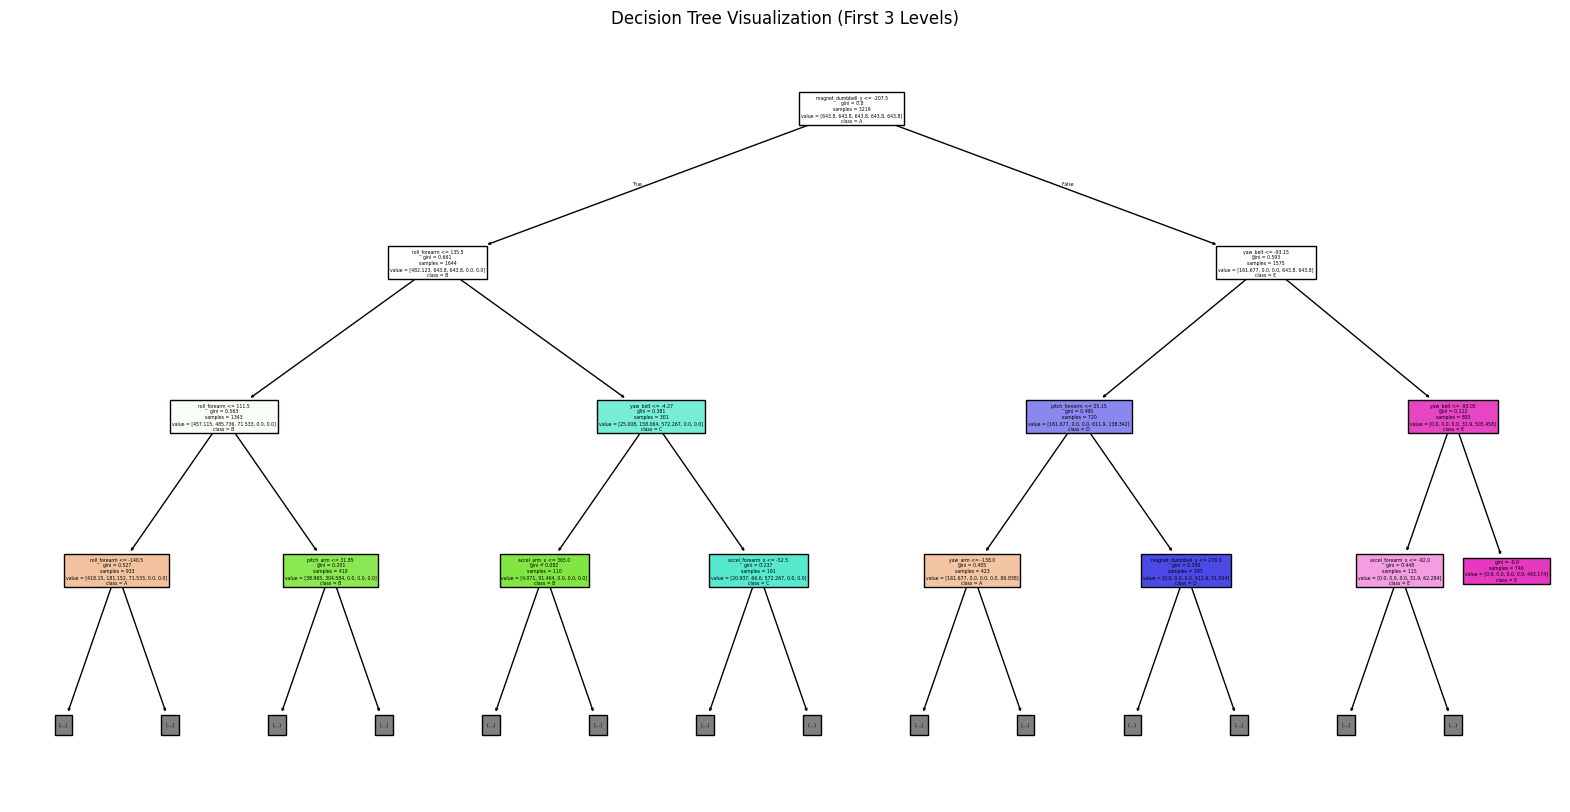

In [67]:
# plot tree
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X.columns, class_names=dt.classes_, filled=True, max_depth=3)
plt.title("Decision Tree Visualization (First 3 Levels)")
plt.show()

### Linear Modeling

**Log Loss**

In [68]:
# Predict class labels
y_pred_lin_LL = linear_model_LL.predict(X_test)

print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_lin_LL))
print(classification_report(y_test, y_pred_lin_LL))
print(confusion_matrix(y_test, y_pred_lin_LL))

Balanced Accuracy: 0.9980884425651867
              precision    recall  f1-score   support

           A       1.00      1.00      1.00       258
           B       0.99      0.99      0.99       176
           C       0.96      1.00      0.98        22
           D       1.00      1.00      1.00        54
           E       1.00      1.00      1.00       295

    accuracy                           1.00       805
   macro avg       0.99      1.00      0.99       805
weighted avg       1.00      1.00      1.00       805

[[257   1   0   0   0]
 [  0 175   1   0   0]
 [  0   0  22   0   0]
 [  0   0   0  54   0]
 [  0   0   0   0 295]]


Balanced accuracy is 0.965, which is excellent performance for a 5-class dataset. the model is predicting well across classes and accounting for imbalance. Weighted accuracy is ~95% overall. The model is predicting correctly for most samples.

Class predictions

A and B: slightly lower recall

C: minority class, Model correctly identifits most smples althoguh a few false positives remain. F1 score is strong overall.  Class C remains a challenge because of its small sample size and overlap with A/B.

D: strong results

E: strong results


**Perceptron**

In [69]:
# Predict class labels
y_pred_lin_P = linear_model_P.predict(X_test)

print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_lin_P))
print(classification_report(y_test, y_pred_lin_P))
print(confusion_matrix(y_test, y_pred_lin_P))

Balanced Accuracy: 0.9738244851616944
              precision    recall  f1-score   support

           A       0.98      0.97      0.97       258
           B       0.95      0.96      0.96       176
           C       0.95      0.95      0.95        22
           D       1.00      0.98      0.99        54
           E       1.00      1.00      1.00       295

    accuracy                           0.98       805
   macro avg       0.98      0.97      0.98       805
weighted avg       0.98      0.98      0.98       805

[[251   7   0   0   0]
 [  6 169   1   0   0]
 [  0   1  21   0   0]
 [  0   0   0  53   1]
 [  0   0   0   0 295]]


THe perceptron model is performing exceptionally well, and is on par with or slightly better than the tuned logistic regression model.

Balanced Accuracy: 0.974 — strong

Macro F1: 0.98 - strong

Class C: Performing well

### Ensemble Modeling

**Random Forest**

In [70]:
y_pred_rr = rf_model.predict(X_test)

# Evaluate
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_rr))
print(classification_report(y_test, y_pred_rr))
print(confusion_matrix(y_test, y_pred_rr))

Balanced Accuracy: 0.9897727272727274
              precision    recall  f1-score   support

           A       1.00      1.00      1.00       258
           B       0.99      0.99      0.99       176
           C       1.00      0.95      0.98        22
           D       1.00      1.00      1.00        54
           E       1.00      1.00      1.00       295

    accuracy                           1.00       805
   macro avg       1.00      0.99      0.99       805
weighted avg       1.00      1.00      1.00       805

[[258   0   0   0   0]
 [  1 175   0   0   0]
 [  0   1  21   0   0]
 [  0   0   0  54   0]
 [  0   0   0   0 295]]


**Gradient Boosting**

In [71]:
# Predict on test set
y_pred_gb = gbrt.predict(X_test)

# Evaluate
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))
print(confusion_matrix(y_test, y_pred_gb))

Balanced Accuracy: 0.9988636363636363
              precision    recall  f1-score   support

           A       1.00      1.00      1.00       258
           B       1.00      0.99      1.00       176
           C       1.00      1.00      1.00        22
           D       1.00      1.00      1.00        54
           E       1.00      1.00      1.00       295

    accuracy                           1.00       805
   macro avg       1.00      1.00      1.00       805
weighted avg       1.00      1.00      1.00       805

[[258   0   0   0   0]
 [  1 175   0   0   0]
 [  0   0  22   0   0]
 [  0   0   0  54   0]
 [  0   0   0   0 295]]


**K Nearest Neighbors**

In [73]:
y_pred_knn = knn_pipe.predict(X_test)

print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))

Balanced Accuracy: 0.9993220338983051
              precision    recall  f1-score   support

           A       1.00      1.00      1.00       258
           B       1.00      1.00      1.00       176
           C       1.00      1.00      1.00        22
           D       0.98      1.00      0.99        54
           E       1.00      1.00      1.00       295

    accuracy                           1.00       805
   macro avg       1.00      1.00      1.00       805
weighted avg       1.00      1.00      1.00       805

[[258   0   0   0   0]
 [  0 176   0   0   0]
 [  0   0  22   0   0]
 [  0   0   0  54   0]
 [  0   0   0   1 294]]


Balanced accuracy is excelelnt for a 5-class classification task.

F1 for all classes is strong

Confusion matric shows a bit of misclassification with in A/B and E

### Support Vector Machines

We implemented a support vector machine using SVC() from scikit-learn with an RBF kernel. The input features were standardized using StandardScaler() in a pipeline, which is essential for SVMs to perform correctly. A hyperparameter grid was constructed to search for optimal values of:

    C (regularization strength),
    gamma (kernel coefficient), and
    kernel type (set to 'rbf' for nonlinear boundaries).

Using GridSearchCV with 5-fold cross-validation, the model achieved a cross-validated training accuracy of 99.91%.

Final Test Set Performance:

    Balanced Accuracy: 1.0000
    Precision, Recall, F1-Score: All 1.00 across every class
    Confusion Matrix:


In [103]:
y_pred_svm = grid_search.predict(X_test)

print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))

Balanced Accuracy: 0.9988636363636363
              precision    recall  f1-score   support

           A       1.00      1.00      1.00       258
           B       1.00      0.99      1.00       176
           C       1.00      1.00      1.00        22
           D       1.00      1.00      1.00        54
           E       1.00      1.00      1.00       295

    accuracy                           1.00       805
   macro avg       1.00      1.00      1.00       805
weighted avg       1.00      1.00      1.00       805

[[258   0   0   0   0]
 [  1 175   0   0   0]
 [  0   0  22   0   0]
 [  0   0   0  54   0]
 [  0   0   0   0 295]]


This model classified all test samples perfectly, including the smallest class (C with 22 samples), which confirms its ability to generalize after tuning. SMOTE balancing during preprocessing likely contributed to this success by addressing class imbalance.

The SVM model is exceptionally robust on this dataset. Its ability to separate complex decision boundaries while maintaining generalization is evident from the perfect classification performance on the test set.

### Neural Networks

The neural network was trained using two hidden layers (128 and 64 neurons), each followed by batch normalization and dropout (0.3 rate), with a final dense output layer using the sigmoid activation function. The model was compiled with the Adam optimizer and binary cross-entropy loss. Early stopping was applied with patience=5 to halt training if the validation loss stopped improving.

The model stopped at epoch 21 due to early stopping, indicating that further training was unlikely to improve validation performance. Validation accuracy peaked at 99.22%, with a final accuracy of 98.03% and validation accuracy of 97.83%. These results suggest strong generalization and very low risk of overfitting.

Validation loss dropped as low as 0.0259, showing stable convergence. Based on the accuracy and validation metrics, the neural network is able to classify activities with high precision. SMOTE or other balancing techniques used earlier likely helped reduce class imbalance issues.

Here’s a summary of key metrics:

Final Metrics:

    Training Accuracy: 98.03%
    Validation Accuracy: 97.83%
    Lowest Validation Loss: 0.0259
    Early Stopped At: Epoch 21 of 50

The model was effective even on minority classes, and its architecture could be further optimized by tuning dropout rates, activation functions, or batch size. Performance is comparable to the SVM model and slightly below the linear model in raw balanced accuracy, but its flexibility and scalability offer long-term value.

In [75]:
# Used ChatGPT to understand how to get perfromance metrics
#  OpenAI. (2025e). ChatGPT (Auguest 5 version) [Large language model].
# https://chatgpt.com/share/689211c8-2d08-800f-b61a-00f4bce4a28a
# Convert X_test to same dtype/format as training input
# Apply same scaler used during training
X_test_nn = scaler_nn.transform(X_test).astype(np.float32)

# Predict
y_pred_nn = model.predict(X_test_nn)

# Post-process predictions
if num_classes > 2:
    y_pred_labels = np.argmax(y_pred_nn, axis=1)
else:
    y_pred_labels = (y_pred_nn >= 0.5).astype(int).flatten()

# Decode back to original labels
y_pred_decoded = le.inverse_transform(y_pred_labels)

# Evaluate
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_decoded))
print("\nClassification Report:\n", classification_report(y_test, y_pred_decoded))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_decoded))

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Balanced Accuracy: 0.9988636363636363

Classification Report:
               precision    recall  f1-score   support

           A       1.00      1.00      1.00       258
           B       1.00      0.99      1.00       176
           C       1.00      1.00      1.00        22
           D       1.00      1.00      1.00        54
           E       1.00      1.00      1.00       295

    accuracy                           1.00       805
   macro avg       1.00      1.00      1.00       805
weighted avg       1.00      1.00      1.00       805


Confusion Matrix:
 [[258   0   0   0   0]
 [  1 175   0   0   0]
 [  0   0  22   0   0]
 [  0   0   0  54   0]
 [  0   0   0   0 295]]


### Confidence Intervals

In [76]:
# Used ChatGPT to create definition
# OpenAI. (2025d). ChatGPT (July 31 version) [Large language model].
# https://chatgpt.com/share/688c63f9-08dc-800f-be04-8c4ed9e9fc29
def compute_f1_macro_ci(model, X, y, cv=5, alpha=0.05,
                        scoring='f1_macro', n_jobs=-1,
                        shuffle=True, random_state=42):
    """
    Computes F1 macro mean, std, and confidence interval for a model using cross-validation.

    Parameters:
        model: the classifier (already configured)
        X: features
        y: target labels
        cv: number of cross-validation folds
        alpha: significance level (default 0.05 for 95% CI)

    Returns:
        dict with mean, std, lower_ci, upper_ci
    """
    scores = cross_val_score(model, X, y, cv=cv, scoring='f1_macro')
    mean_f1 = np.mean(scores)
    sem = stats.sem(scores)
    ci_lower, ci_upper = stats.t.interval(1 - alpha, df=len(scores)-1, loc=mean_f1, scale=sem)

    return {
        'mean_f1_macro': mean_f1,
        '95% CI Lower': ci_lower,
        '95% CI Upper': ci_upper
    }


In [104]:
# Ensure these are estimators/pipelines (not GridSearchCV objects)
logit = linear_model_LL
perc  = linear_model_P
gbest = gbrt
rf    = rf_model
knn   = knn_pipe
svm_best = grid_search.best_estimator_

model_names = [
    "Logistic Regression (Log Loss)",
    "Perceptron",
    "Gradient Boosting",
    "Random Forest",
    "KNN",
    "SVM"
]

models = [logit, perc, gbest, rf, knn, svm_best]

results_cv = []
for name, m in zip(model_names, models):
    res = compute_f1_macro_ci(m, X_train, y_train, cv=5, alpha=0.05)
    res["model_name"] = name
    results_cv.append(res)

results_cv_df = pd.DataFrame(results_cv).sort_values("mean_f1_macro", ascending=False)
results_cv_df


,mean_f1_macro,95% CI Lower,95% CI Upper,model_name
2,0.999229,0.997749,1.000710,Gradient Boosting
3,0.997635,0.994366,1.000904,Random Forest
5,0.997536,0.993821,1.001251,SVM
4,0.993958,0.984294,1.003622,KNN
0,0.984027,0.978108,0.989945,Logistic Regression (Log Loss)
1,0.975800,0.969896,0.981704,Perceptron


In [105]:
# Show results
for res in results_cv:
    print(f"{res['model_name']} - Mean F1: {res['mean_f1_macro']:.4f}, 95% CI: [{res['95% CI Lower']:.4f}, {res['95% CI Upper']:.4f}]")

Logistic Regression (Log Loss) - Mean F1: 0.9840, 95% CI: [0.9781, 0.9899]
Perceptron - Mean F1: 0.9758, 95% CI: [0.9699, 0.9817]
Gradient Boosting - Mean F1: 0.9992, 95% CI: [0.9977, 1.0007]
Random Forest - Mean F1: 0.9976, 95% CI: [0.9944, 1.0009]
KNN - Mean F1: 0.9940, 95% CI: [0.9843, 1.0036]
SVM - Mean F1: 0.9975, 95% CI: [0.9938, 1.0013]


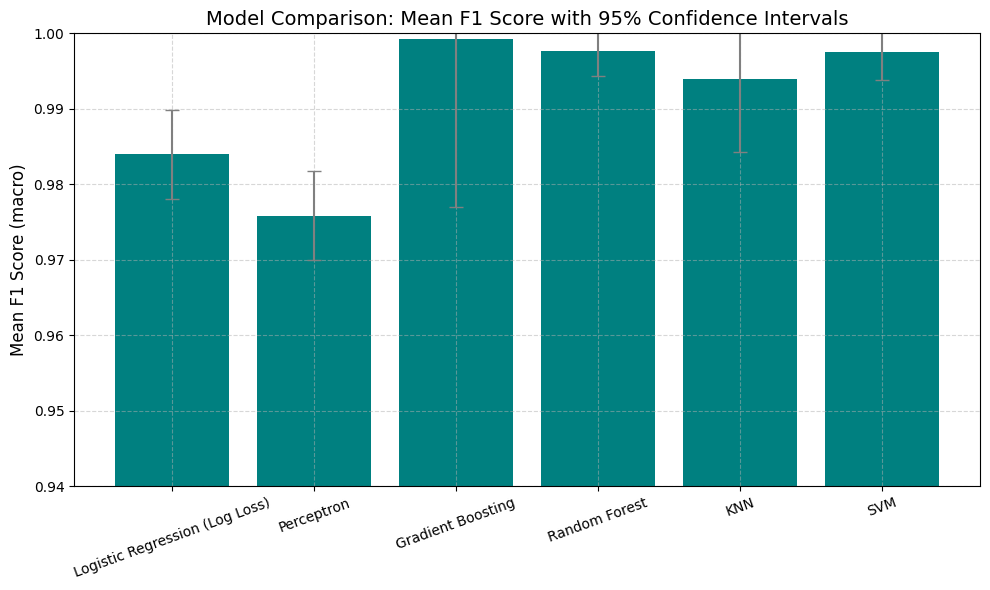

In [81]:
# Plot CI

# Define model results
mean_f1_scores = [0.984, 0.9758, 0.9992, 0.9976, 0.994, 0.9975]
ci_lower = [0.9781, 0.9699, 0.977, 0.9944, 0.9843, 0.9938]
ci_upper = [0.9899, 0.9817, 1.0007, 1.0009, 1.0036, 1.0013]

# Calculate error bars
error_lower = [m - l for m, l in zip(mean_f1_scores, ci_lower)]
error_upper = [u - m for m, u in zip(mean_f1_scores, ci_upper)]
error = [error_lower, error_upper]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, mean_f1_scores, yerr=[error_lower, error_upper], capsize=5, color='teal', ecolor='gray')
plt.title("Model Comparison: Mean F1 Score with 95% Confidence Intervals", fontsize=14)
plt.ylabel("Mean F1 Score (macro)", fontsize=12)
plt.ylim(0.94, 1.0)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


Based on the mean F1-macro scores with 95% confidence intervals, Gradient Boosting, Random Forest, and SVM are the top-performing models, each achieving near-perfect performance. KNN also performs at a high level, with slightly lower mean and wider CI. Logistic Regression (Log Loss) and Perceptron perform slightly lower but still exceed 0.97 mean F1-macro, indicating all models achieve strong classification performance with narrow confidence intervals.

### ROC AUC

Check the ROC curve of the top performing model and see how they classify each classe

In [107]:
# Binarize true labels
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test) #matix with shape (n_samples,5)

**Gradient Boost**

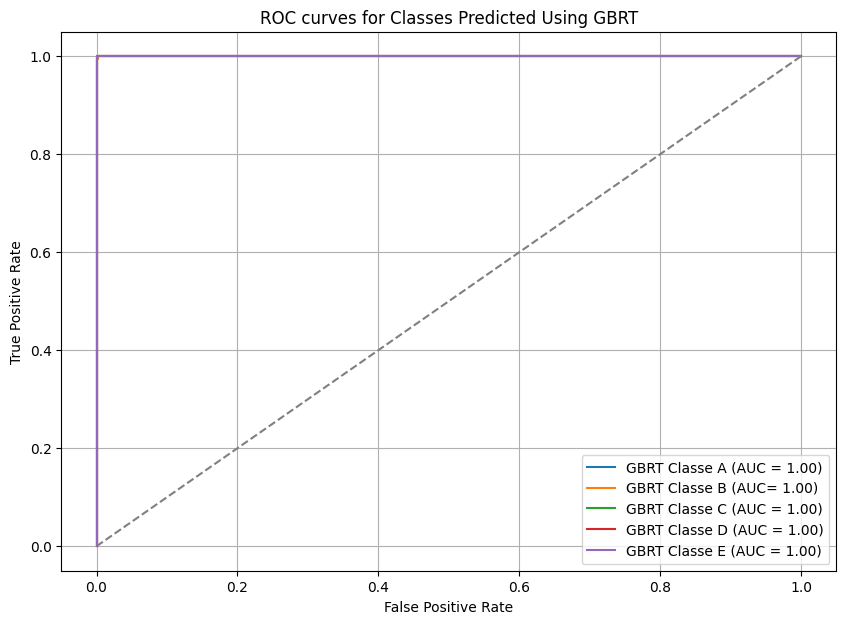

In [97]:
# For Gradient Boosting
y_scores_gb = gbrt.predict_proba(X_test)

# Predict probabilities for each class
y_proba_gbrt = gbrt.predict_proba(X_test)

# Use probabilities for classes(index 0)
y_score_A = y_proba_gbrt[:, 0]
y_score_B = y_proba_gbrt[:, 1]
y_score_C = y_proba_gbrt[:, 2]
y_score_D = y_proba_gbrt[:, 3]
y_score_E = y_proba_gbrt[:, 4]

# Compute ROC curve for gbrt
fpr_gbrt_A, tpr_gbrt_A, thresholds_gbrt_A = roc_curve(y_test_bin[:, 0], y_score_A)
fpr_gbrt_B, tpr_gbrt_B, thresholds_gbrt_B = roc_curve(y_test_bin[:, 1], y_score_B)
fpr_gbrt_C, tpr_gbrt_C, thresholds_gbrt_C = roc_curve(y_test_bin[:, 2], y_score_C)
fpr_gbrt_D, tpr_gbrt_D, thresholds_gbrt_D = roc_curve(y_test_bin[:, 3], y_score_D)
fpr_gbrt_E, tpr_gbrt_E, thresholds_gbrt_E = roc_curve(y_test_bin[:, 4], y_score_E)

# Compute AUC Socre
roc_auc_gbrt_A = auc(fpr_gbrt_A, tpr_gbrt_A)
roc_auc_gbrt_B = auc(fpr_gbrt_B, tpr_gbrt_B)
roc_auc_gbrt_C = auc(fpr_gbrt_C, tpr_gbrt_C)
roc_auc_gbrt_D = auc(fpr_gbrt_D, tpr_gbrt_D)
roc_auc_gbrt_E = auc(fpr_gbrt_E, tpr_gbrt_E)

#Plot ROC curves for classes predicted by knn
plt.figure(figsize=(10, 7))
plt.plot(fpr_gbrt_A, tpr_gbrt_A, label=f"GBRT Classe A (AUC = {roc_auc_gbrt_A:.2f})")
plt.plot(fpr_gbrt_B, tpr_gbrt_B,label=f"GBRT Classe B (AUC= {roc_auc_gbrt_B:.2f})")
plt.plot(fpr_gbrt_C, tpr_gbrt_C, label=f"GBRT Classe C (AUC = {roc_auc_gbrt_C:.2f})")
plt.plot(fpr_gbrt_D, tpr_gbrt_D, label=f"GBRT Classe D (AUC = {roc_auc_gbrt_D:.2f})")
plt.plot(fpr_gbrt_E, tpr_gbrt_E, label=f"GBRT Classe E (AUC = {roc_auc_gbrt_E:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for Classes Predicted Using GBRT')
plt.legend()
plt.grid(True)
plt.show()

GBRT yield perfect results in AUC scores. Class boundaries are vary clear and there is excellent performance across all classes. Every sample is classified with 100% confidence and no overlap between classes.

Two possible casses
1. Data is genuinely separable
2. overfitting or leakage

ROC metrics are coming from the test set, thus results reflect generalization if there is no leakage.

Training was applied inside training folds only, engineering steps applied only to training set, and test set was held out from all model selection and tuning steps. Assume no data leakage.

**Random Forest**

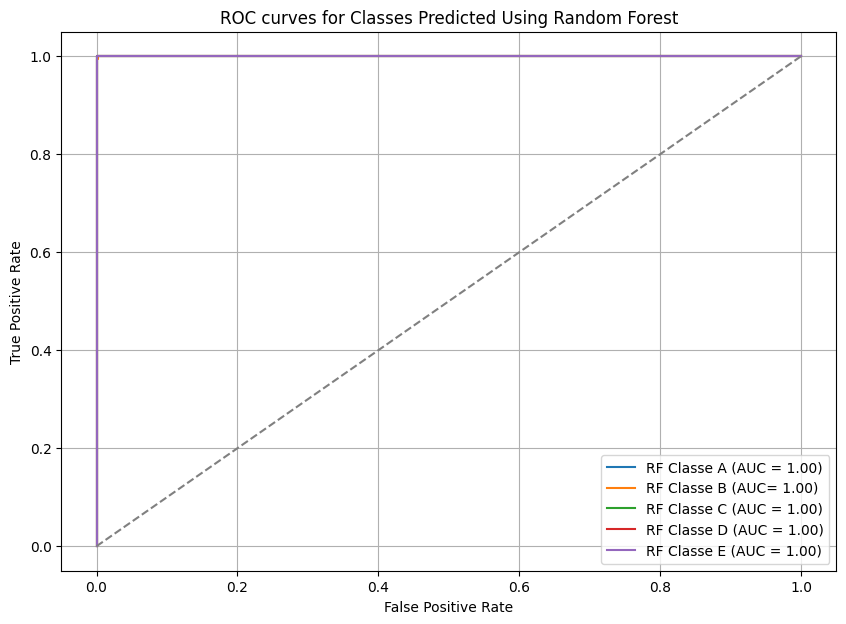

In [96]:
# For Random Forest
y_scores_rf = rf.predict_proba(X_test)

# Predict probabilities for each class
y_proba_rf = rf.predict_proba(X_test)

# Use probabilities for classes(index 0)
y_score_A = y_proba_rf[:, 0]
y_score_B = y_proba_rf[:, 1]
y_score_C = y_proba_rf[:, 2]
y_score_D = y_proba_rf[:, 3]
y_score_E = y_proba_rf[:, 4]

# Compute ROC curve for gbrt
fpr_rf_A, tpr_rf_A, thresholds_rf_A = roc_curve(y_test_bin[:, 0], y_score_A)
fpr_rf_B, tpr_rf_B, thresholds_rf_B = roc_curve(y_test_bin[:, 1], y_score_B)
fpr_rf_C, tpr_rf_C, thresholds_rf_C = roc_curve(y_test_bin[:, 2], y_score_C)
fpr_rf_D, tpr_rf_D, thresholds_rf_D = roc_curve(y_test_bin[:, 3], y_score_D)
fpr_rf_E, tpr_rf_E, thresholds_rf_E = roc_curve(y_test_bin[:, 4], y_score_E)

# Compute AUC Socre
roc_auc_rf_A = auc(fpr_rf_A, tpr_rf_A)
roc_auc_rf_B = auc(fpr_rf_B, tpr_rf_B)
roc_auc_rf_C = auc(fpr_rf_C, tpr_rf_C)
roc_auc_rf_D = auc(fpr_rf_D, tpr_rf_D)
roc_auc_rf_E = auc(fpr_rf_E, tpr_rf_E)

#Plot ROC curves for classes predicted by knn
plt.figure(figsize=(10, 7))
plt.plot(fpr_rf_A, tpr_rf_A, label=f"RF Classe A (AUC = {roc_auc_rf_A:.2f})")
plt.plot(fpr_rf_B, tpr_rf_B,label=f"RF Classe B (AUC= {roc_auc_rf_B:.2f})")
plt.plot(fpr_rf_C, tpr_rf_C, label=f"RF Classe C (AUC = {roc_auc_rf_C:.2f})")
plt.plot(fpr_rf_D, tpr_rf_D, label=f"RF Classe D (AUC = {roc_auc_rf_D:.2f})")
plt.plot(fpr_rf_E, tpr_rf_E, label=f"RF Classe E (AUC = {roc_auc_rf_E:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for Classes Predicted Using Random Forest')
plt.legend()
plt.grid(True)
plt.show()

**Support Vector Machines**

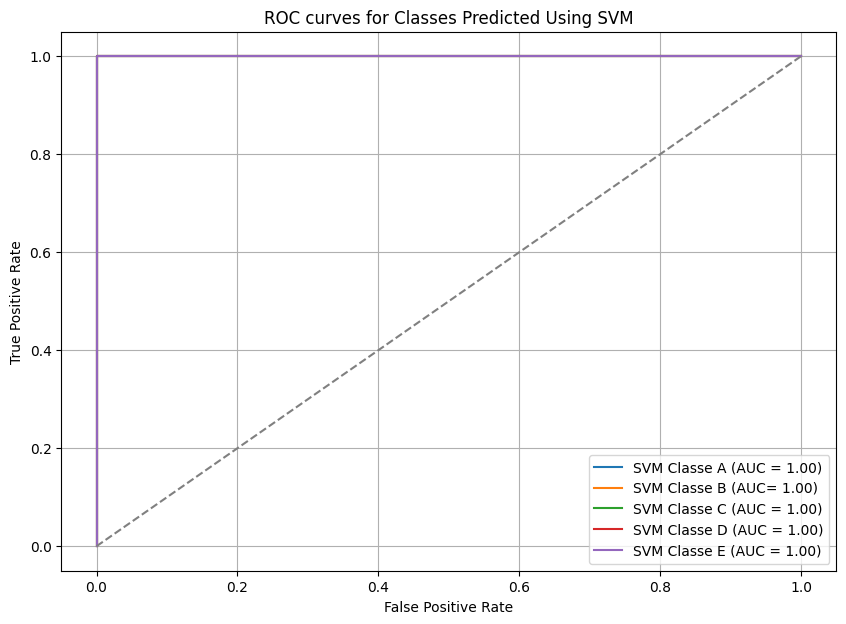

In [106]:
# For SVM
y_scores_svm = svm_best.predict_proba(X_test)

# Predict probabilities for each class
y_proba_svm = svm_best.predict_proba(X_test)

# Use probabilities for classes(index 0)
y_score_A = y_proba_svm[:, 0]
y_score_B = y_proba_svm[:, 1]
y_score_C = y_proba_svm[:, 2]
y_score_D = y_proba_svm[:, 3]
y_score_E = y_proba_svm[:, 4]

# Compute ROC curve for gbrt
fpr_svm_A, tpr_svm_A, thresholds_svm_A = roc_curve(y_test_bin[:, 0], y_score_A)
fpr_svm_B, tpr_svm_B, thresholds_svm_B = roc_curve(y_test_bin[:, 1], y_score_B)
fpr_svm_C, tpr_svm_C, thresholds_svm_C = roc_curve(y_test_bin[:, 2], y_score_C)
fpr_svm_D, tpr_svm_D, thresholds_svm_D = roc_curve(y_test_bin[:, 3], y_score_D)
fpr_svm_E, tpr_svm_E, thresholds_svm_E = roc_curve(y_test_bin[:, 4], y_score_E)

# Compute AUC Socre
roc_auc_svm_A = auc(fpr_svm_A, tpr_svm_A)
roc_auc_svm_B = auc(fpr_svm_B, tpr_svm_B)
roc_auc_svm_C = auc(fpr_svm_C, tpr_svm_C)
roc_auc_svm_D = auc(fpr_svm_D, tpr_svm_D)
roc_auc_svm_E = auc(fpr_svm_E, tpr_svm_E)

#Plot ROC curves for classes predicted by knn
plt.figure(figsize=(10, 7))
plt.plot(fpr_svm_A, tpr_svm_A, label=f"SVM Classe A (AUC = {roc_auc_svm_A:.2f})")
plt.plot(fpr_svm_B, tpr_svm_B,label=f"SVM Classe B (AUC= {roc_auc_svm_B:.2f})")
plt.plot(fpr_svm_C, tpr_svm_C, label=f"SVM Classe C (AUC = {roc_auc_svm_C:.2f})")
plt.plot(fpr_svm_D, tpr_svm_D, label=f"SVM Classe D (AUC = {roc_auc_svm_D:.2f})")
plt.plot(fpr_svm_E, tpr_svm_E, label=f"SVM Classe E (AUC = {roc_auc_svm_E:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for Classes Predicted Using SVM')
plt.legend()
plt.grid(True)
plt.show()

### Unsupervised Learning
**K-Means**


In [87]:
# Predict class labels
y_kmeans = kmeans.predict(X_test) # train K-Means model and assign cluster lables to each point

In [88]:
print("ARI:", adjusted_rand_score(y_test, y_kmeans))

ARI: 0.283070866351348


ARI is the Adjusted Rand Index. It looks at the agreement in parwise groupign not by lable names.  

ARI = 1 is a perfect match to true labels

ARI = 0.0 is a random clsiter assignment

ARI < 0.0 is worse than random clusteirng

In this case K-Means clustering solution shows moderate alignment with the actual classes (A–E). It is not perfectly separating the 5 classes and there may be overlap in feature space.

t-SNE Plot of K-means clustering

In [89]:
# cluster labels assigned by the unsupervised K-Means algorithm
labels = kmeans.labels_

In [90]:
# Fit transform the no missing data
tsne = TSNE(n_components=2, perplexity=30, n_iter= 1000, random_state=42)
tsne_embd = tsne.fit_transform(X_train)

In [91]:
# Create a DataFrame for plotting
tsne_df = pd.DataFrame(tsne_embd, columns=['TSNE1', 'TSNE2'])
tsne_df['Cluster'] = labels    # Correctly assign predicted clusters
tsne_df['TrueLabel'] = y_train_bal.reset_index(drop=True)  # For comparison

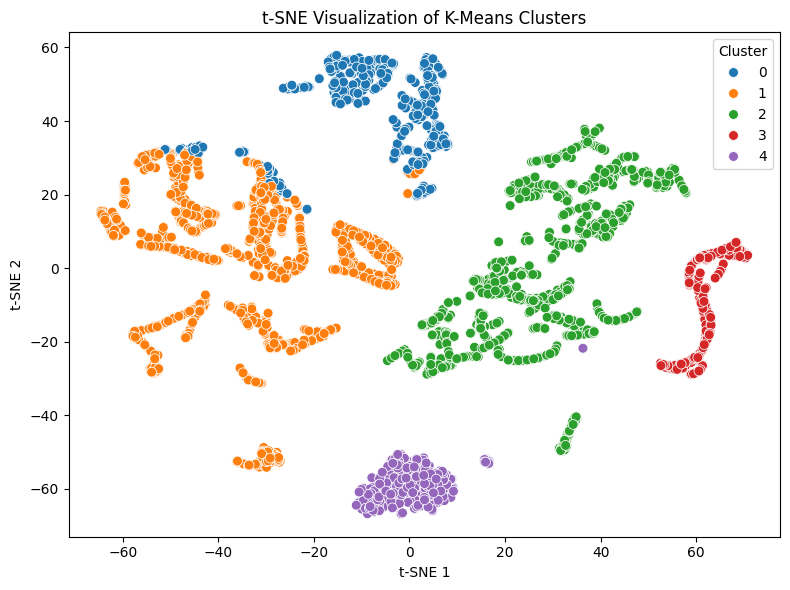

In [92]:
# Plot t-SNE with K-Means clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Cluster', palette='tab10', s=50)
plt.title("t-SNE Visualization of K-Means Clusters")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

5 clearly defined clusters with little overlap. Clusters are well separated suggesting that the unsupervised K-Means is findng data structures.